<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis. </h2>	


In [1]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
import os
import pickle
import seaborn as sns
import cv2 #3.4.2
import PIL
import scipy

# import skimage.filter
from skimage import filters
from skimage import feature
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.filters import gaussian

from skimage.feature import daisy
from skimage import data


import random
from random import shuffle

In [4]:
# eda_data = pd.read_pickle('./starting_data.pkl')
# eda_data

In [2]:
features = pd.read_pickle('./features_labeled.pkl') 

In [3]:
features.columns[14:19]

Index(['fast_corner', 'brief', 'orb', 'sift_kp', 'surf_kp'], dtype='object')

In [6]:
features.columns

Index(['size', 'aspect_ratio', 'r_mean', 'r_std', 'g_mean', 'g_std', 'b_mean',
       'b_std', 'luminance_mean', 'luminance_std', 'cb_mean', 'cb_std',
       'cr_mean', 'cr_std', 'fast_corner', 'brief', 'orb', 'sift_kp',
       'surf_kp', 'canny_edges', 'prewitt_h', 'prewitt_v', 'binarize',
       'harris', 'shi_tomasi', 'label', 'categories'],
      dtype='object')

In [7]:
#Explore Dimensions

def image_sizes(df):
    
    heights = []
    widths = []
    
    for img in df['image']:
        heights.append(img.shape[0])
        widths.append(img.shape[1])
    
    med_height = np.median(heights) #sum(heights) / len(heights)
    med_width = np.median(widths) #sum(widths) / len(widths)
    
    av_height = np.mean(heights) 
    av_width = np.mean(widths) 
    
    
    print("Min Height: " + str(min(heights)))
    print("Max Height: " + str(max(heights)))
    print("Med Height: " + str(med_height))
    print("Av Height: " + str(av_height))
    
    print('**********************************')
    print("Min Width: " + str(min(widths)))
    print("Max Width: " + str(max(widths)))
    print("Med Width: " + str(med_width))
    print("Av Width: " + str(av_width))
    
image_sizes(eda_data)

Min Height: 105
Max Height: 3225
Med Height: 300.0
Av Height: 340.0086608927382
**********************************
Min Width: 115
Max Width: 3424
Med Width: 350.0
Av Width: 403.0126582278481


**Median Width is 350; Median Height is 300. We choose median as we know there are outliers on the upper bound**

<h4> After Feature Generation

In [72]:
# start = pd.read_pickle('./starting_data.pkl') 

In [71]:
# plt.figure(figsize=[12,12])
# ordering=start.groupby(['label']).count().reset_index()
# ordering
# ordering = ordering.sort_values('label',ascending = False)
# ordering.reset_index()


# sns.barplot(x=orderings.groupby(['categories']).mean().reset_index()['categories'],
#             y=features.groupby(['label']).mean()[col],
#             order = ordering['categories'])

In [73]:
# plt.figure(figsize=[12,12])
# ordering = features.groupby(["categories"])['label'].aggregate(np.mean).reset_index().sort_values(col, ascending = False)
# sns.barplot(x=features.groupby(['categories']).mean().reset_index()['categories'],
#             y=features.groupby(['label']).mean()[col],
#             order = ordering['categories'])
# plt.xticks(rotation=45)
# plt.xlabel('Image Category', fontsize=18)
# plt.ylabel("# Images", fontsize=18)
# plt.title("# Images"+' for Each Category of Image', fontsize=22);

In [33]:
def barplot_desc(df,col):
    plt.figure(figsize=[12,12])
    ordering = df.groupby(["categories"])[col].aggregate(np.mean).reset_index().sort_values(col, ascending = False)
    sns.barplot(x=df.groupby(['categories']).mean().reset_index()['categories'],
                y=df.groupby(['label']).mean()[col],
                order = ordering['categories'])
    plt.xticks(rotation=45)
    plt.xlabel('Image Category', fontsize=20)
    plt.ylabel(col, fontsize=20)
    plt.title(col+' for Each Category of Image', fontsize=25);


In [5]:
features.columns

Index(['size', 'aspect_ratio', 'r_mean', 'r_std', 'g_mean', 'g_std', 'b_mean',
       'b_std', 'luminance_mean', 'luminance_std', 'cb_mean', 'cb_std',
       'cr_mean', 'cr_std', 'fast_corner', 'brief', 'orb', 'sift_kp',
       'surf_kp', 'canny_edges', 'prewitt_h', 'prewitt_v', 'binarize',
       'harris', 'shi_tomasi', 'label', 'categories'],
      dtype='object')

DataError: No numeric types to aggregate

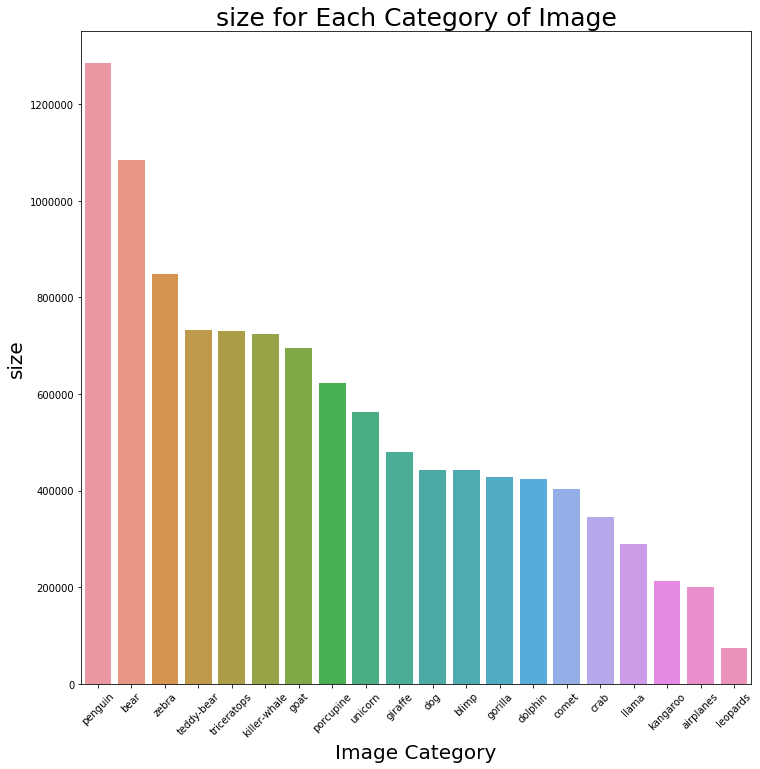

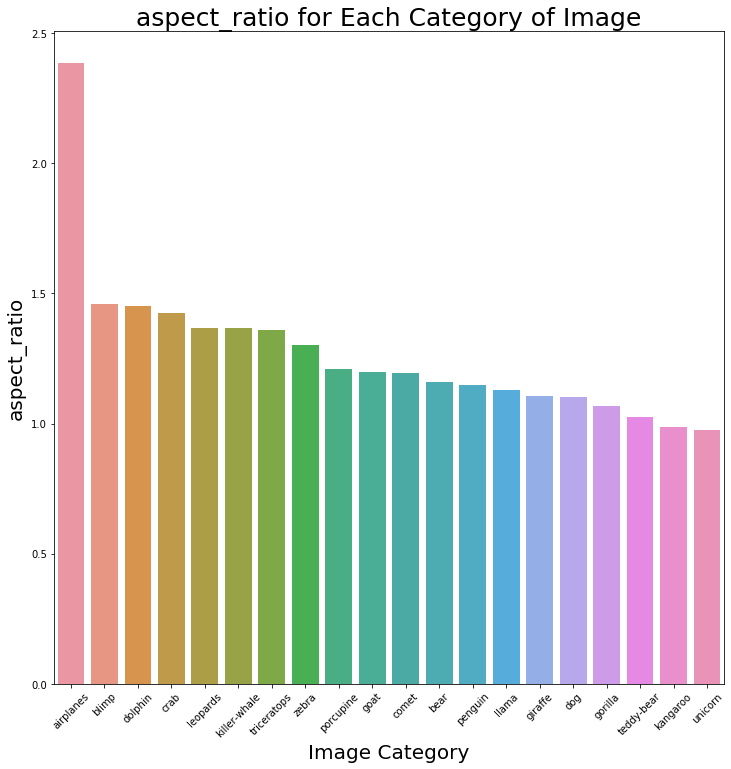

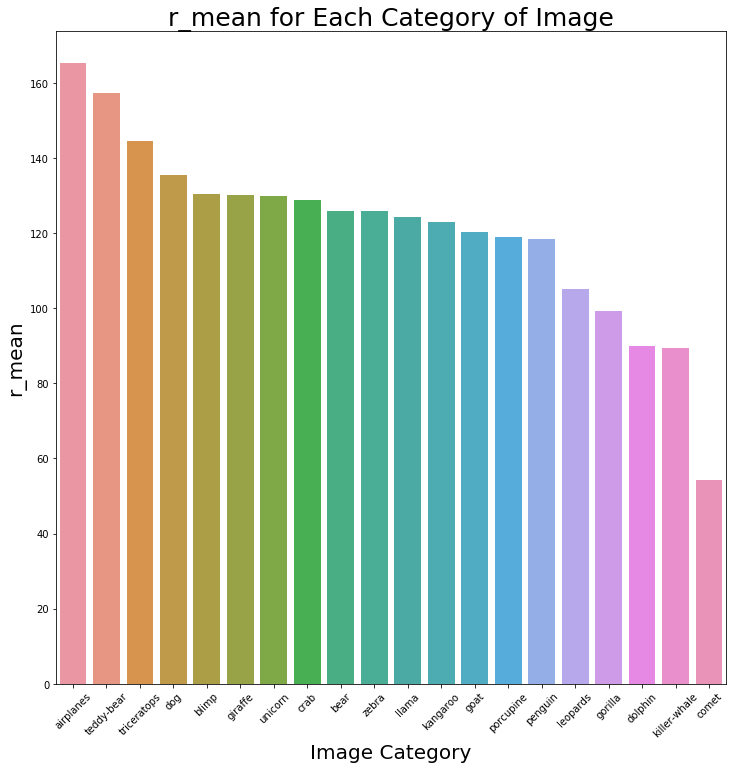

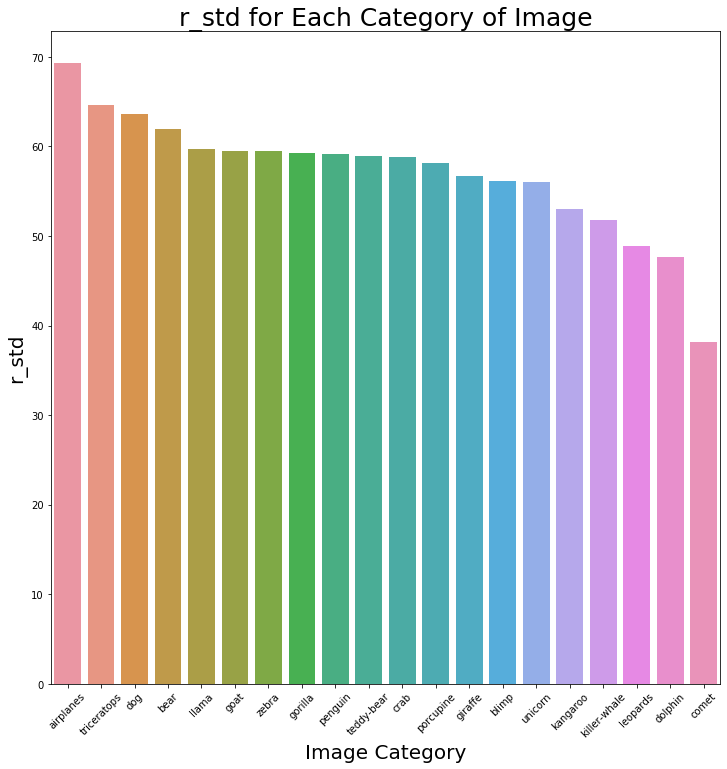

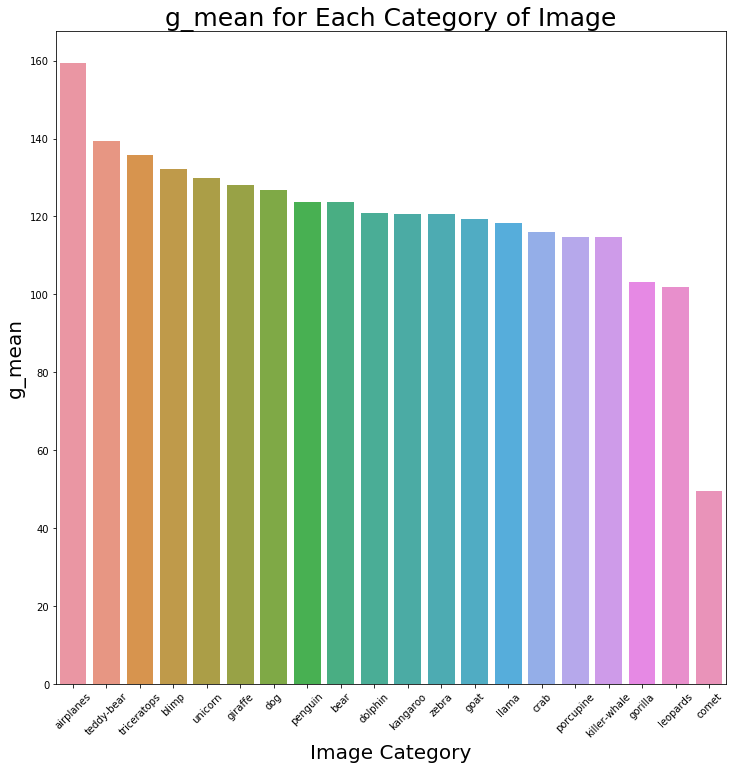

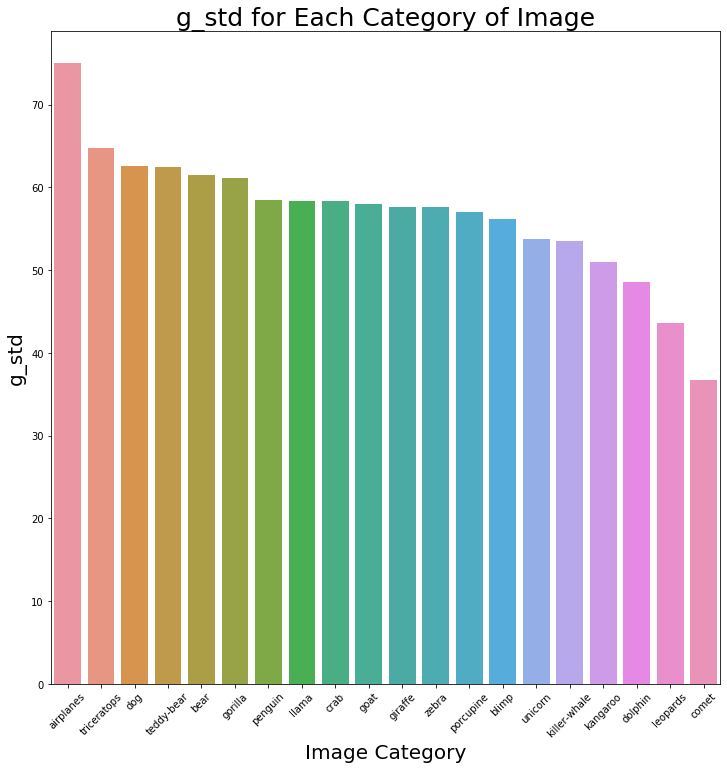

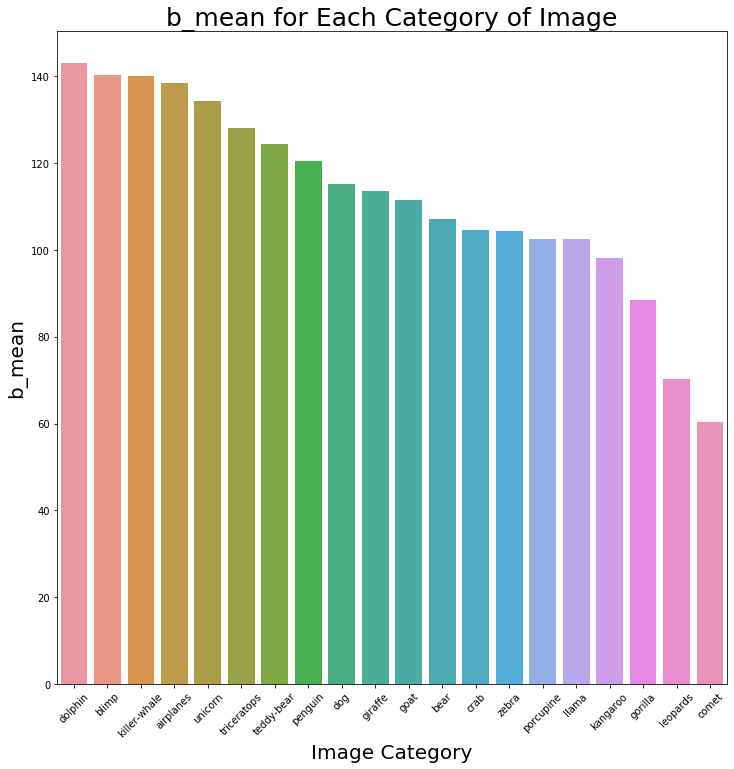

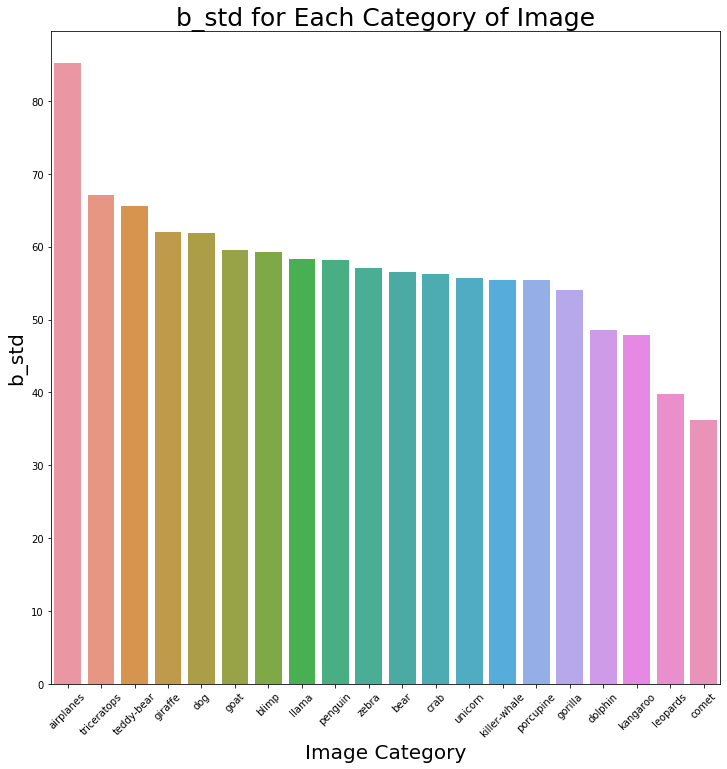

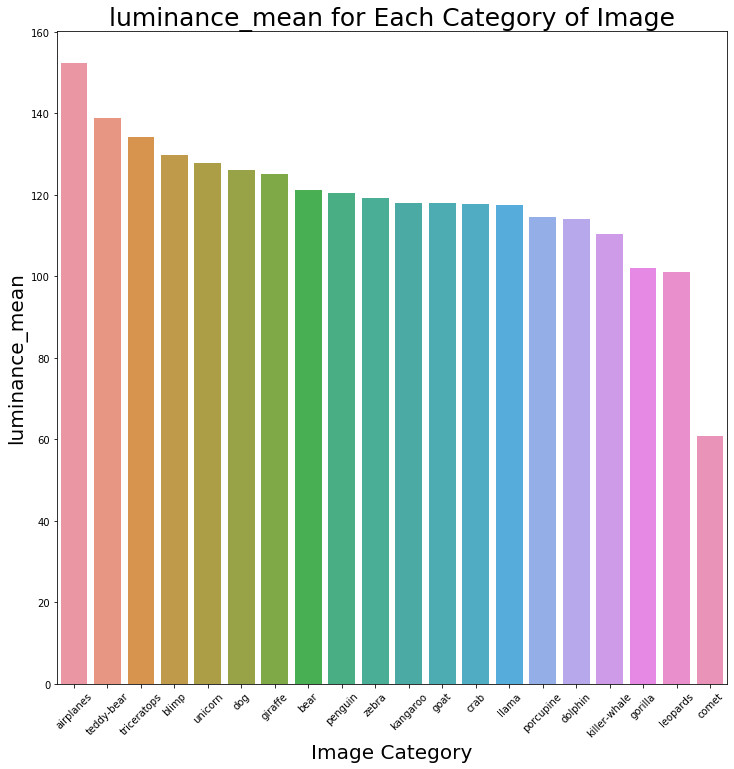

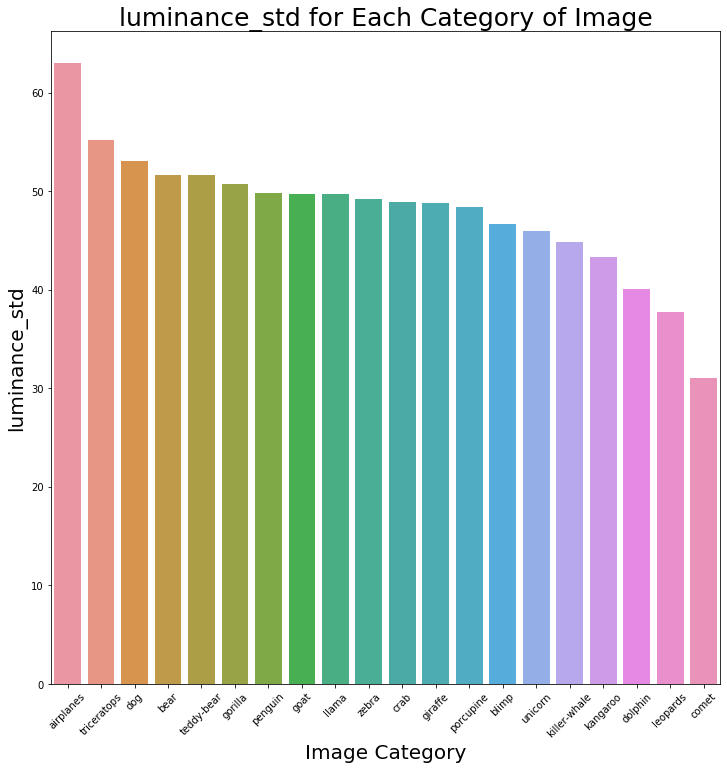

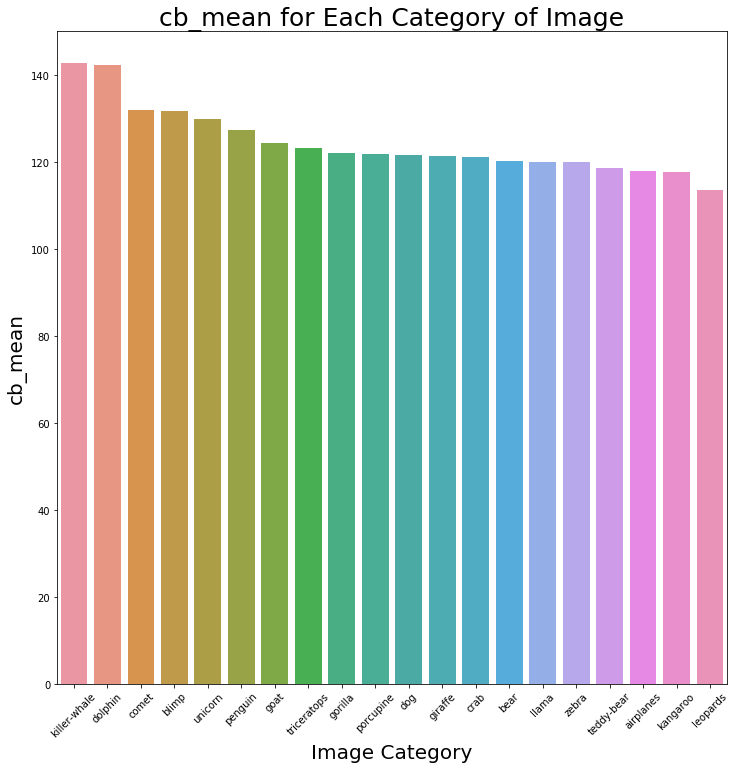

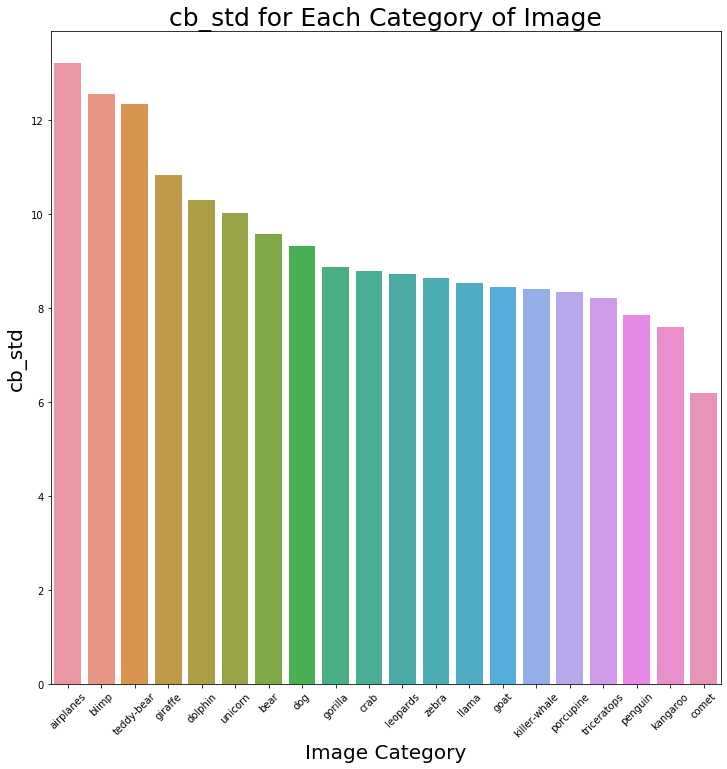

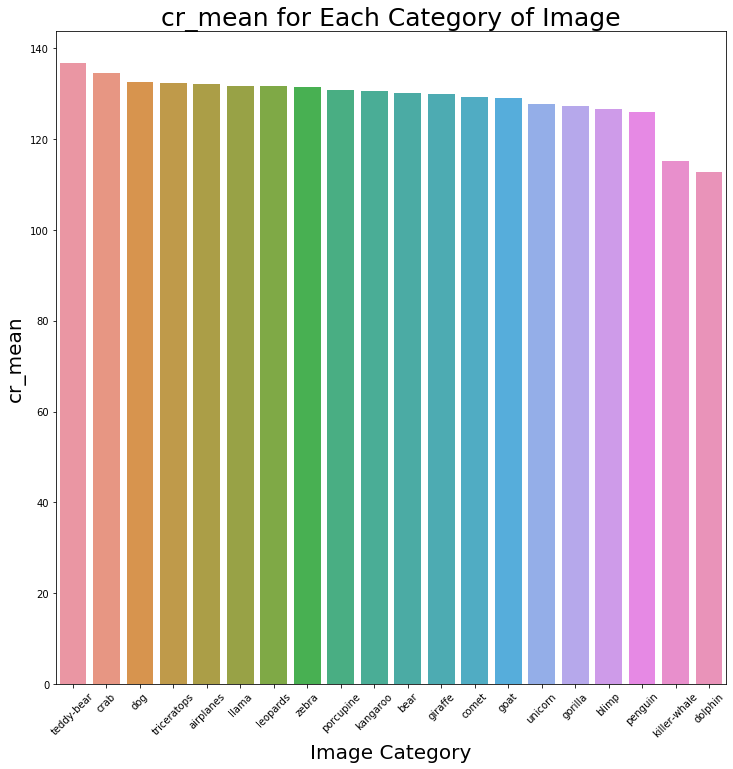

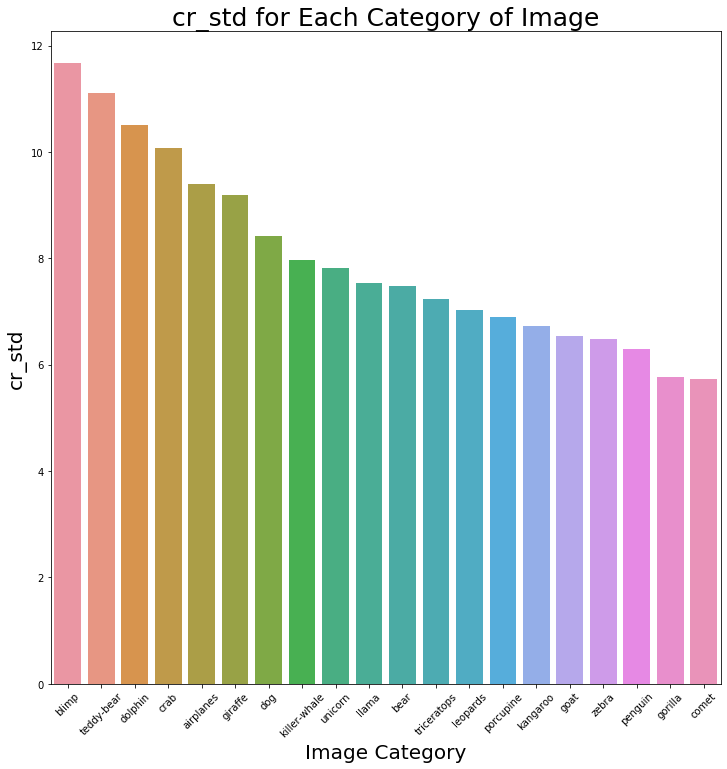

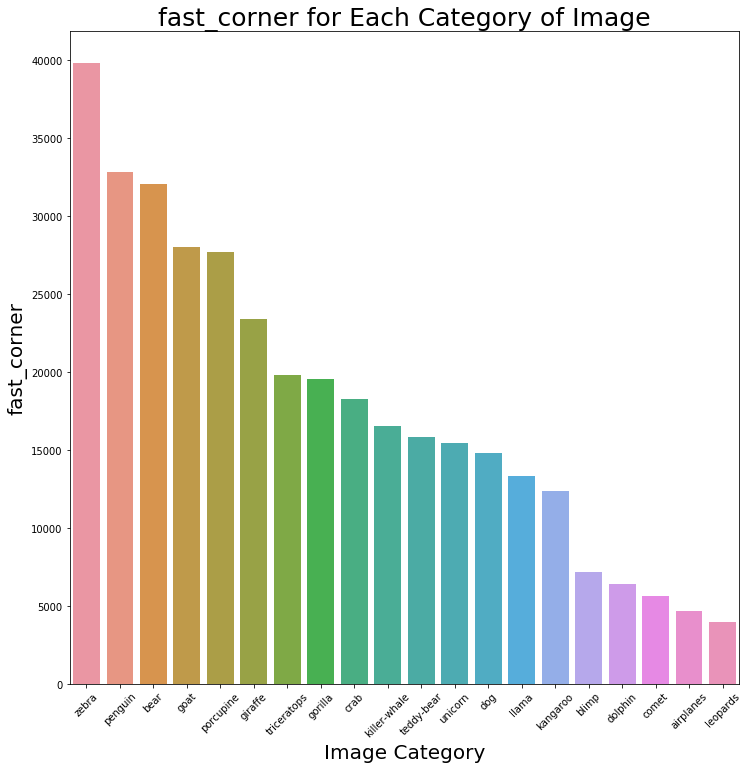

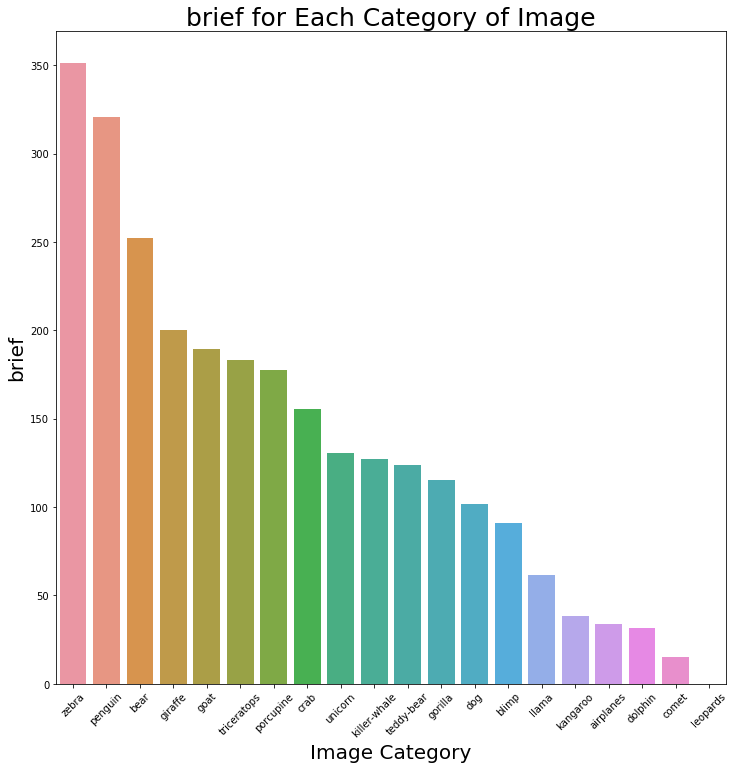

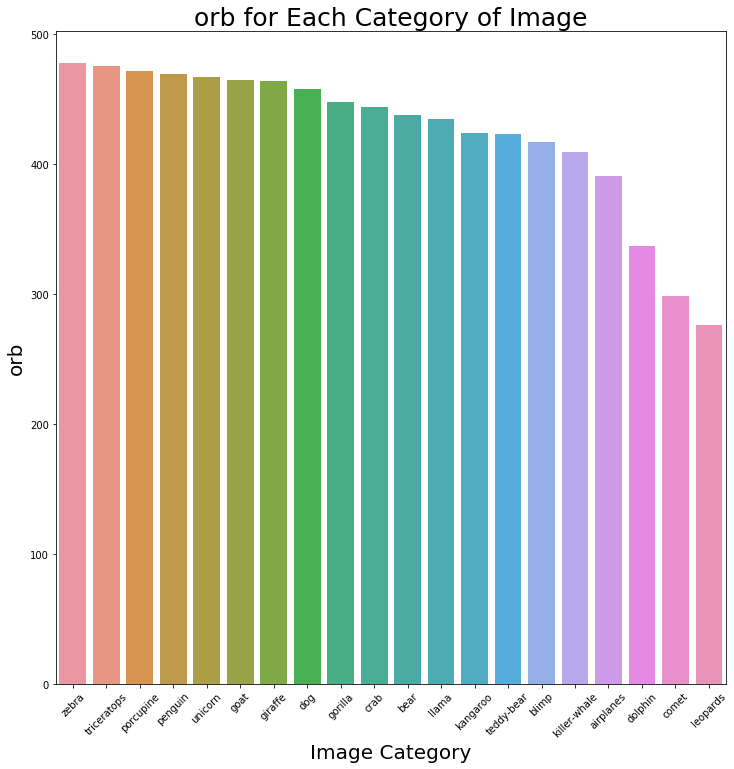

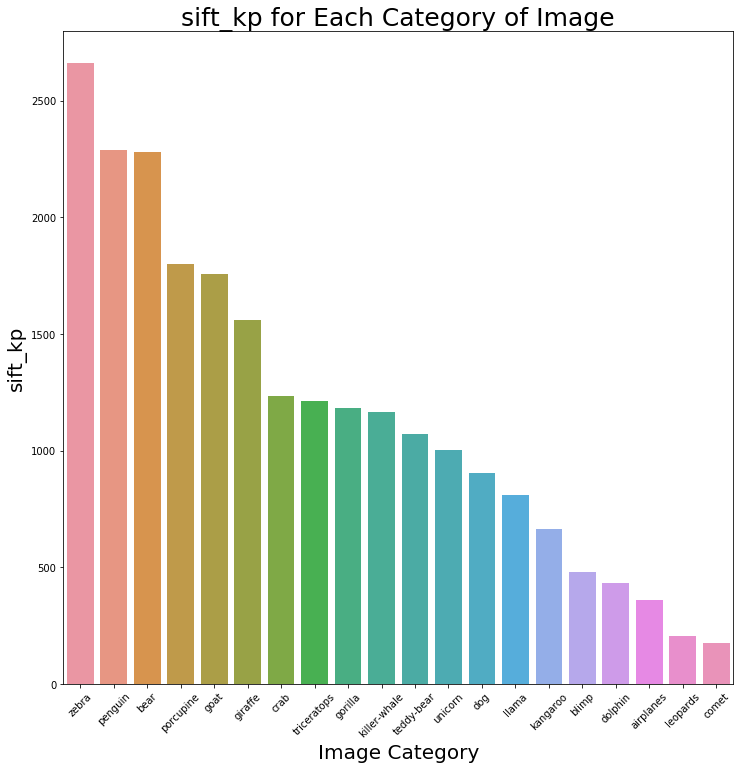

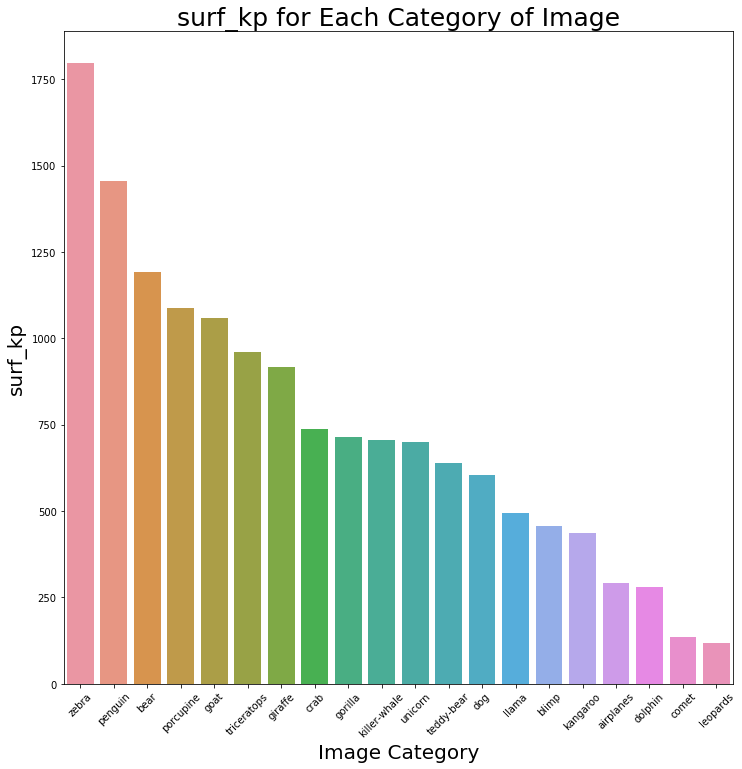

<Figure size 864x864 with 0 Axes>

In [34]:
for col in features.columns:
    barplot_desc(features, col)

In [42]:
def boxplot(df, col_label_str):
    plt.figure(figsize=[12,12])
    sorted_nb = df.groupby(['categories'])[col_label_str].median().sort_values()
    sns.boxplot(x=df['categories'], y=df[col_label_str], order=list(sorted_nb.index));
    plt.xticks(rotation=45)
    
   
    plt.xlabel('Image Category',fontsize=18)
    plt.ylabel(col_label_str,fontsize=18)
    plt.title(col_label_str+ " "+ 'for Each Category of Image',fontsize=22);
    

DataError: No numeric types to aggregate

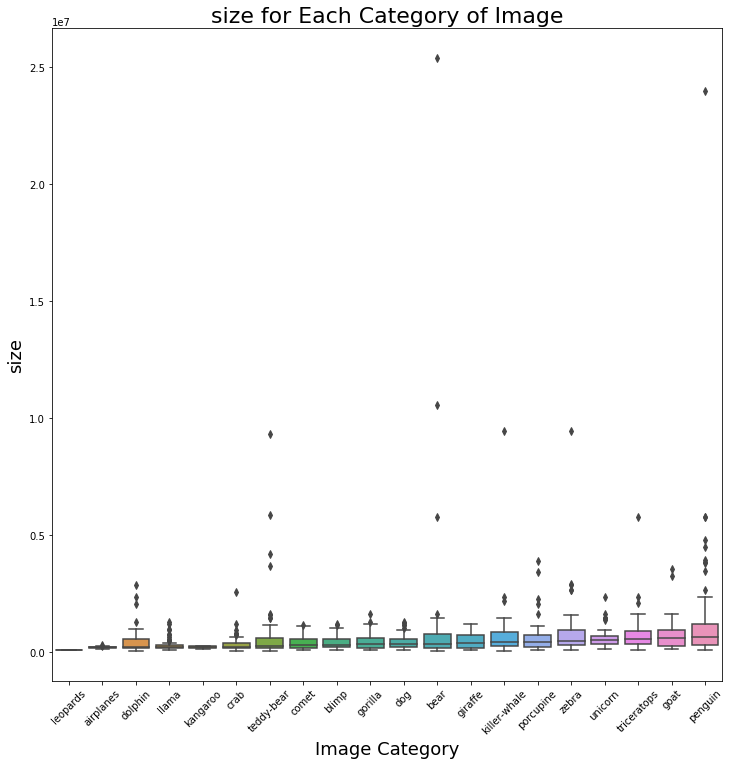

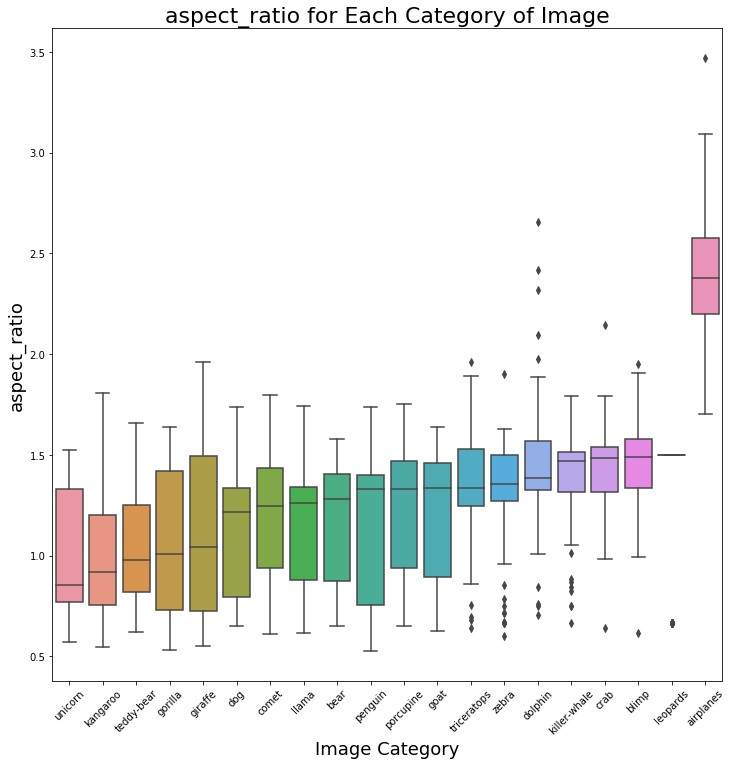

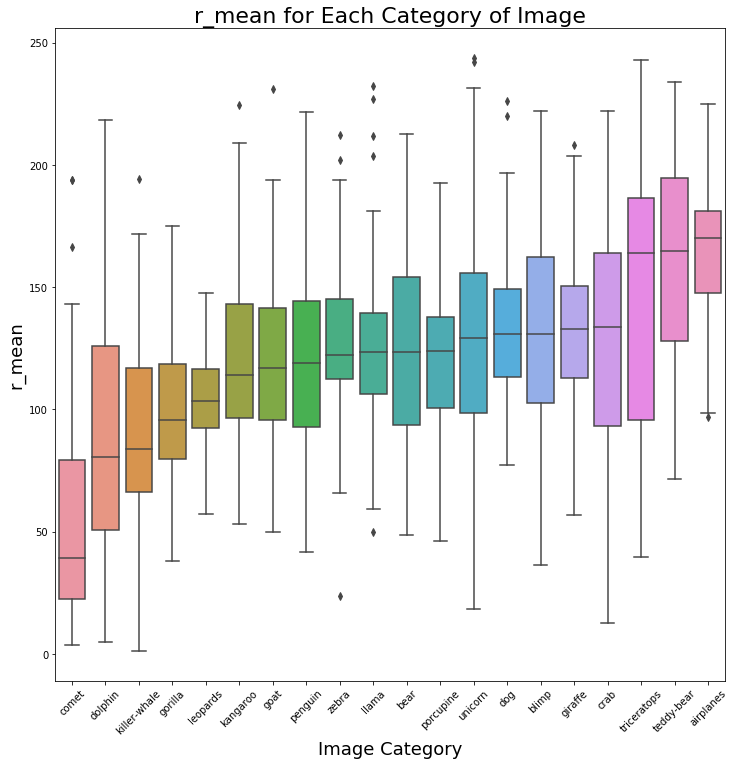

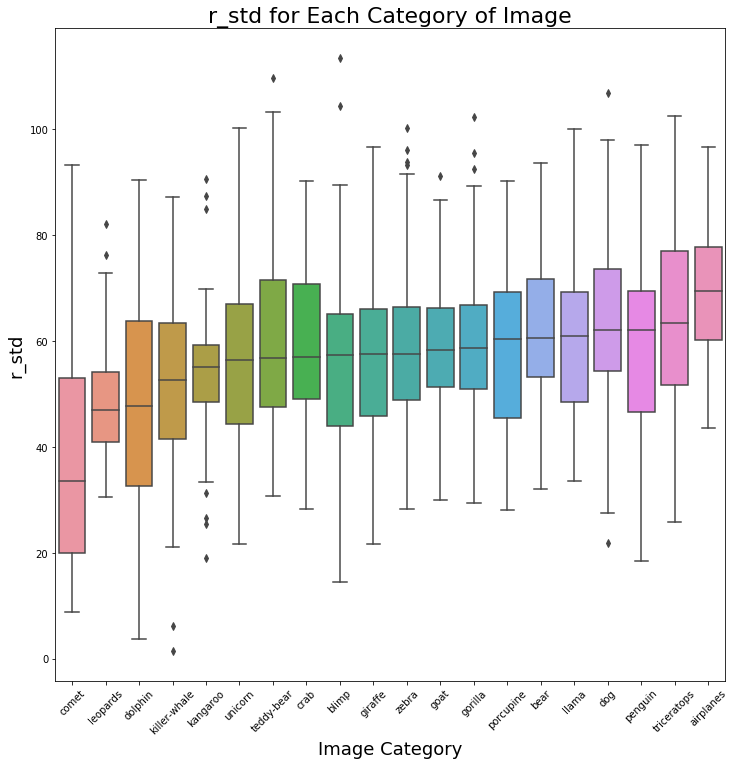

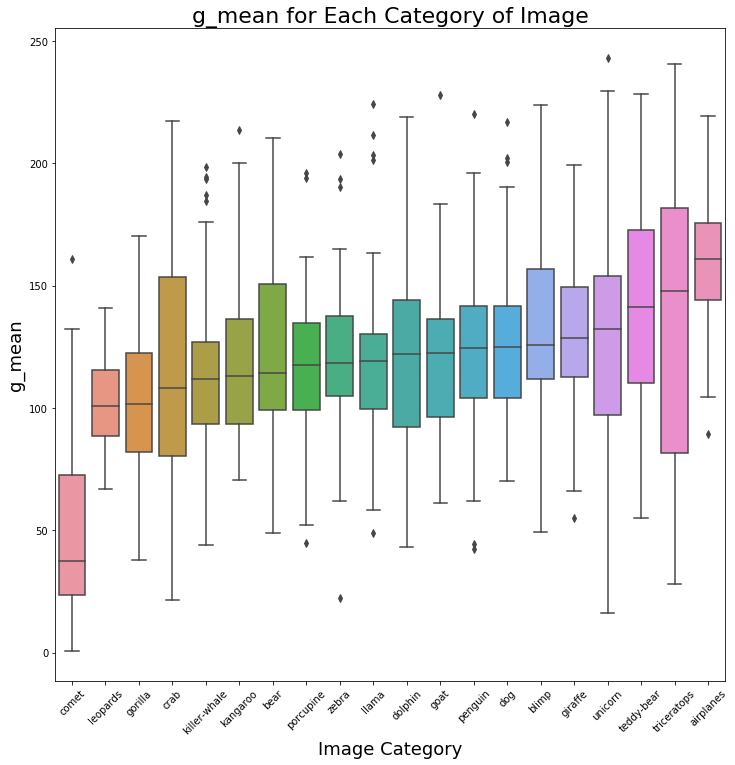

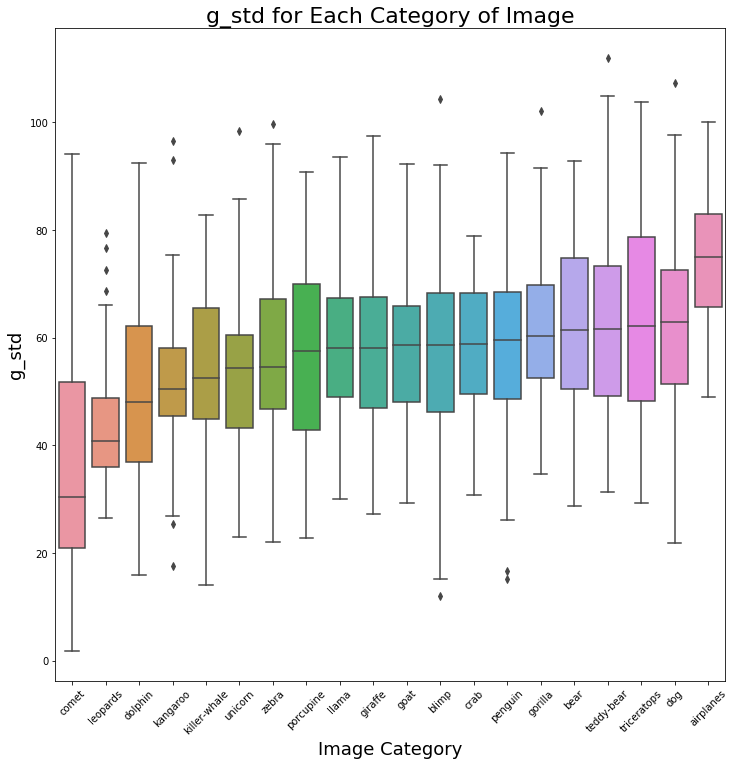

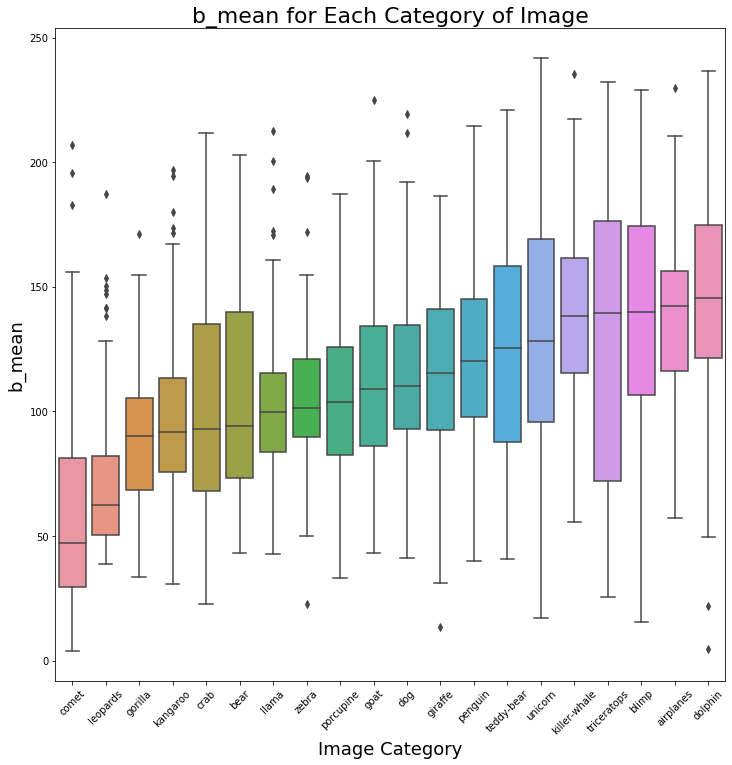

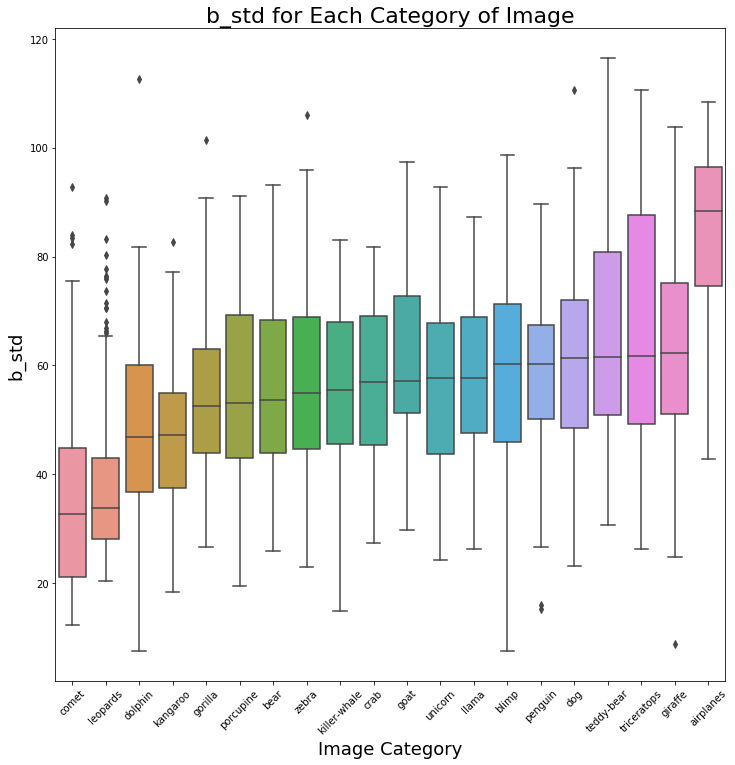

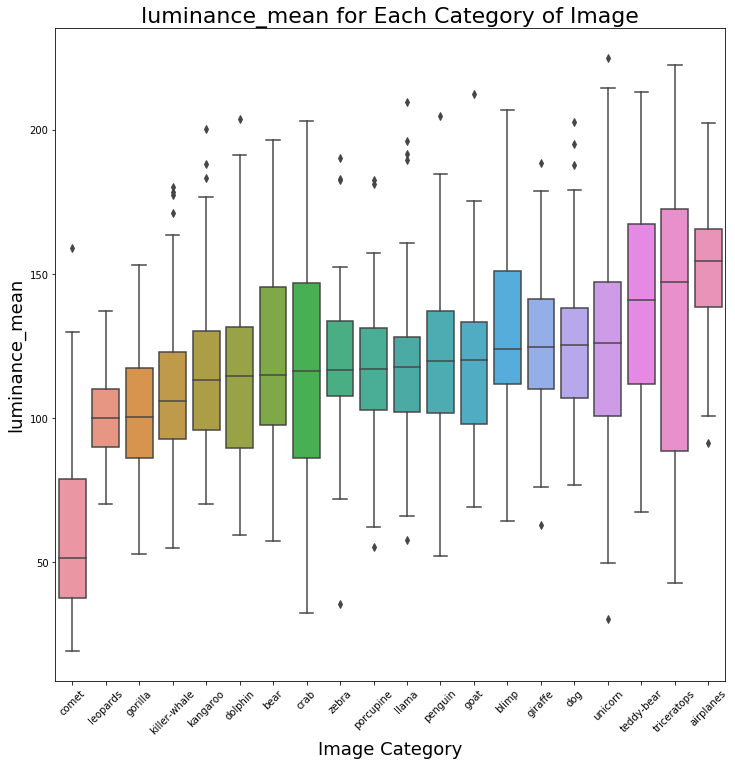

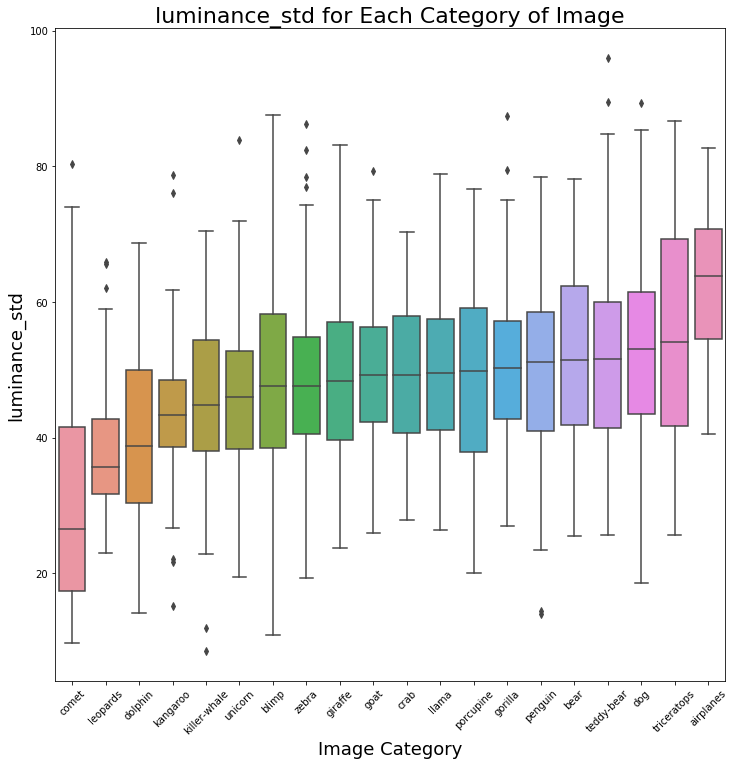

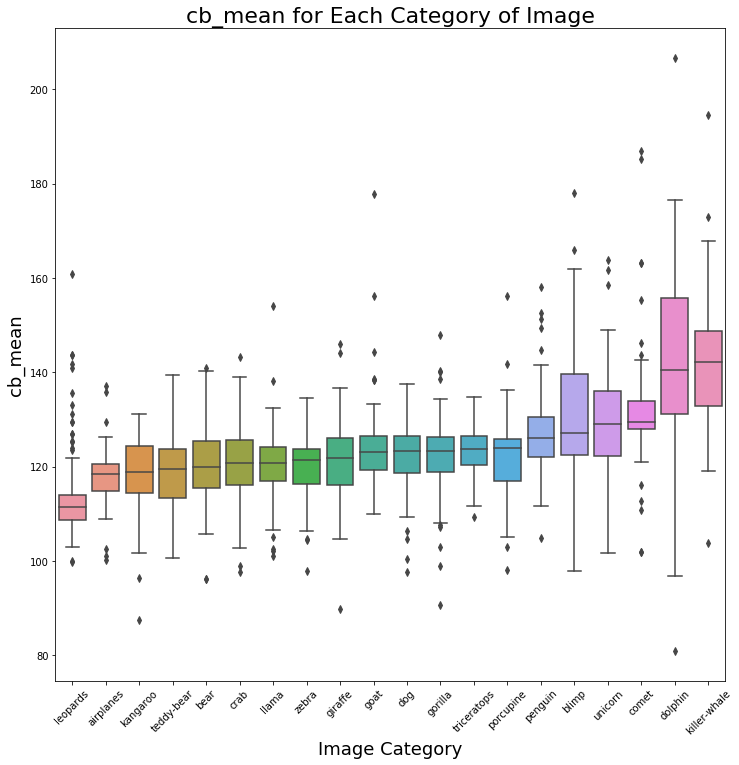

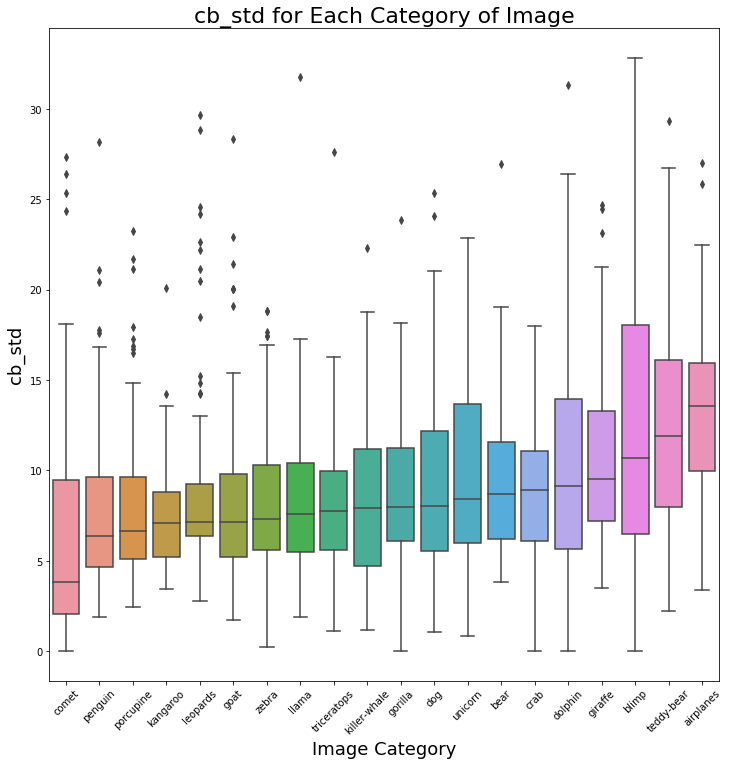

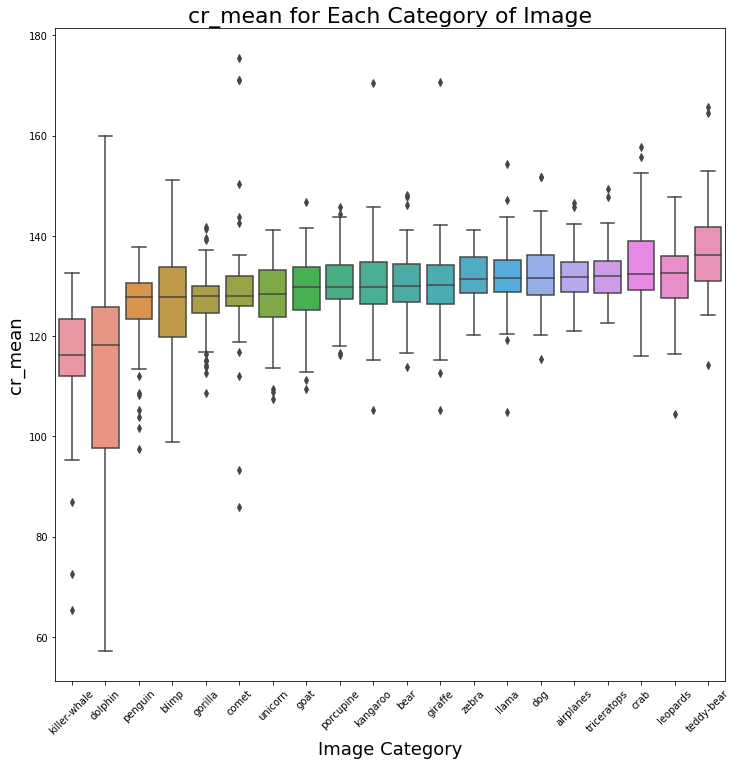

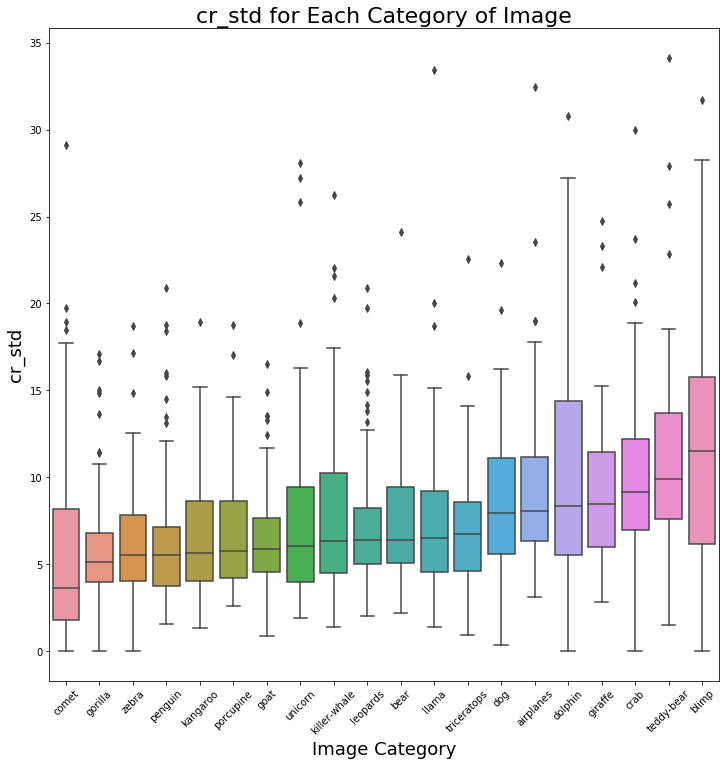

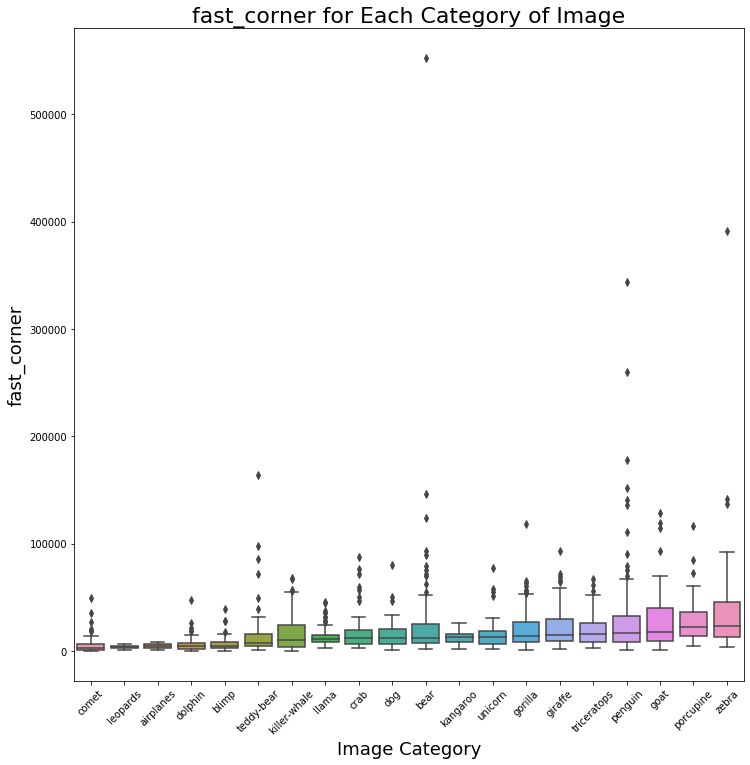

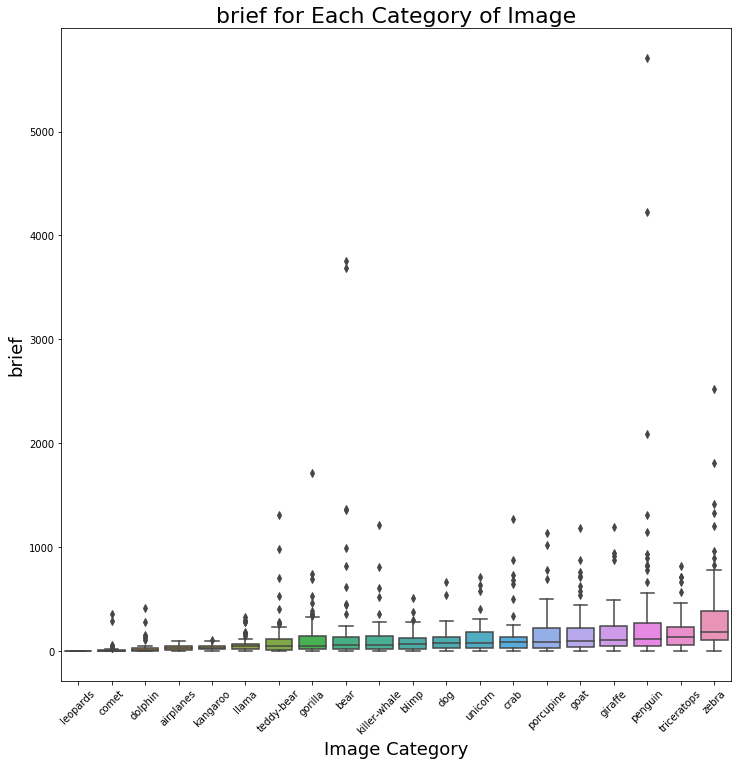

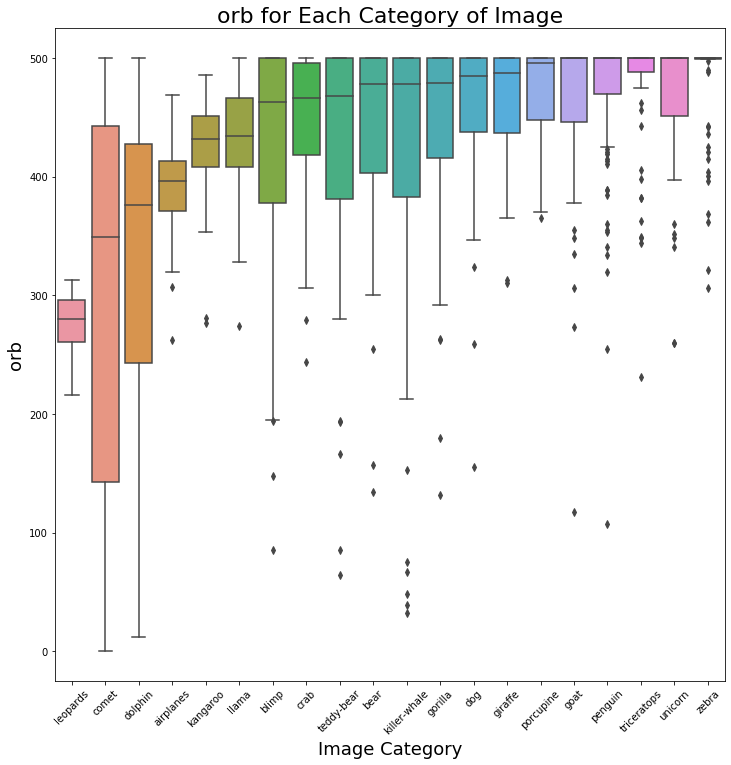

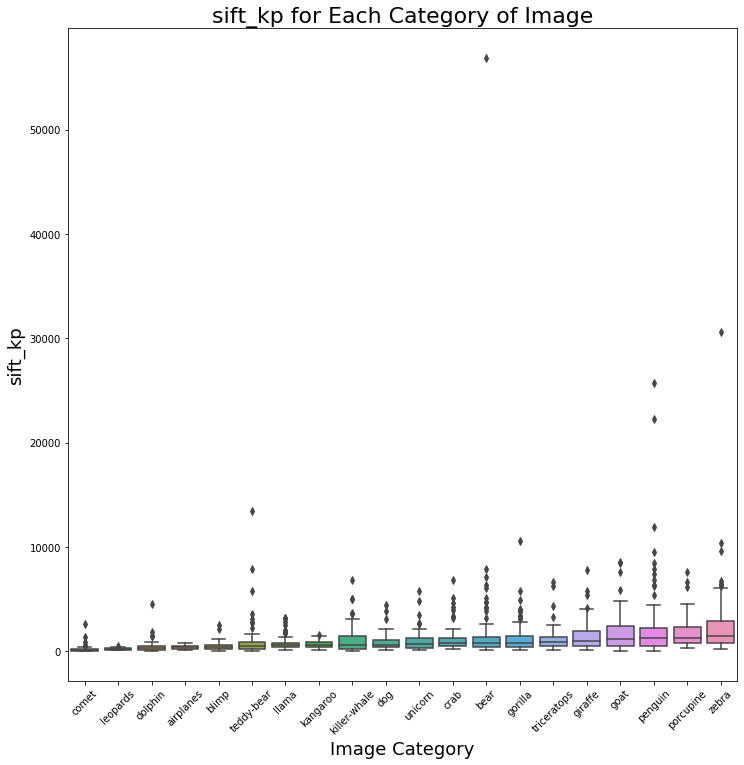

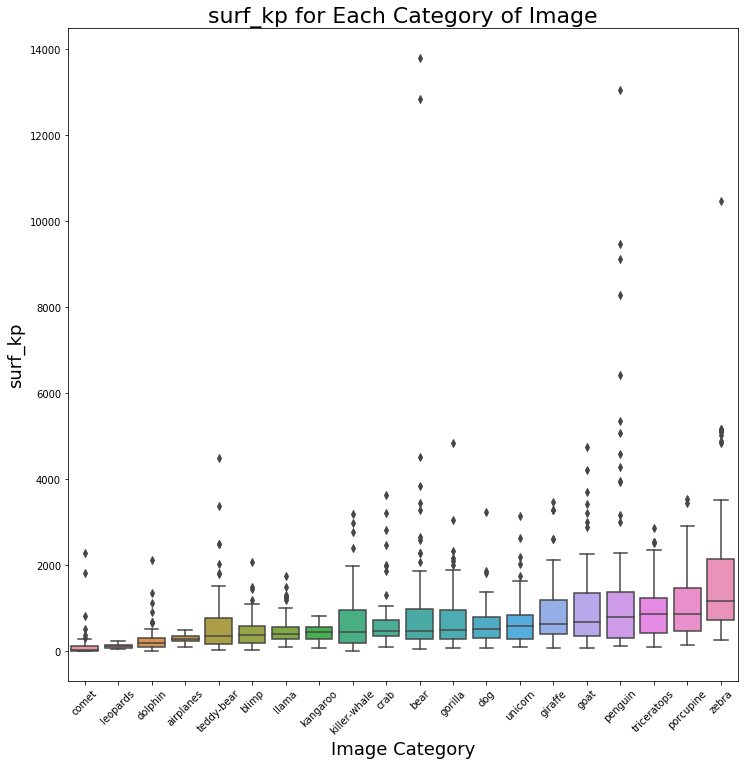

<Figure size 864x864 with 0 Axes>

In [43]:
for col in features.columns:
    boxplot(features, col)

In [33]:
features['categories'].unique()

array(['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin',
       'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale',
       'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear',
       'triceratops', 'unicorn', 'zebra'], dtype=object)

In [35]:
categories=['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin',
       'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale',
       'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear',
       'triceratops', 'unicorn', 'zebra']

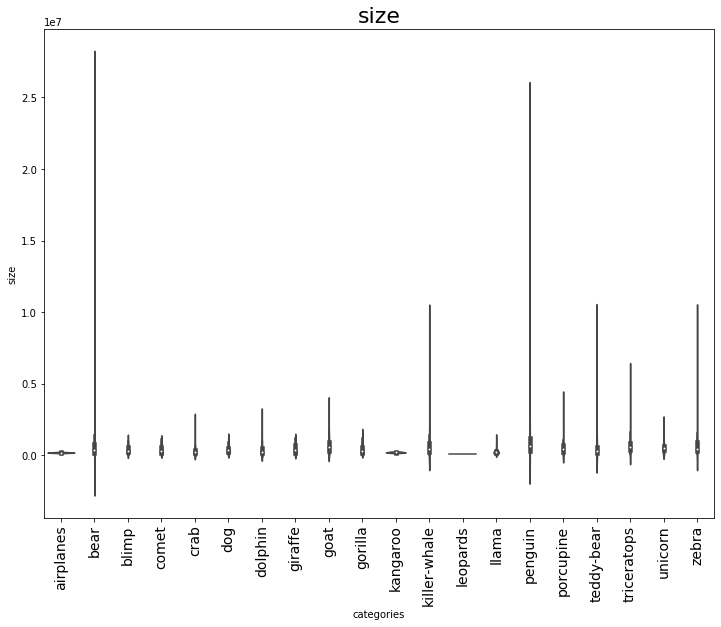

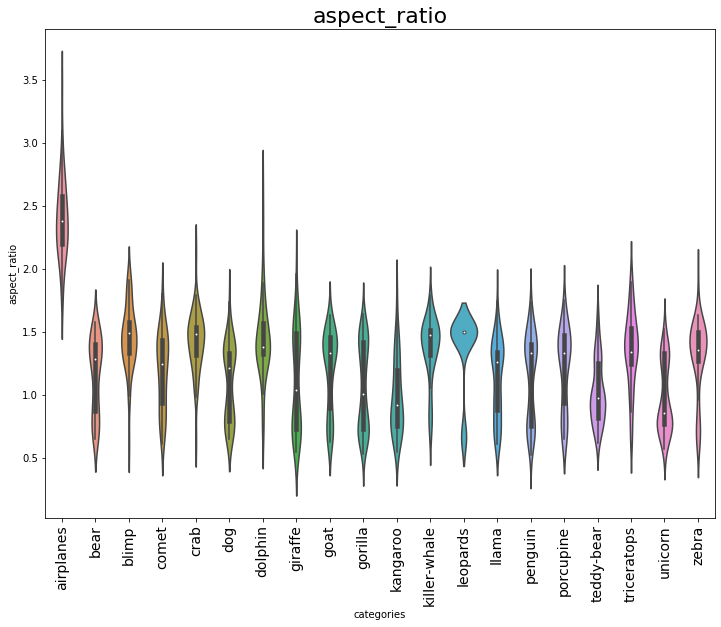

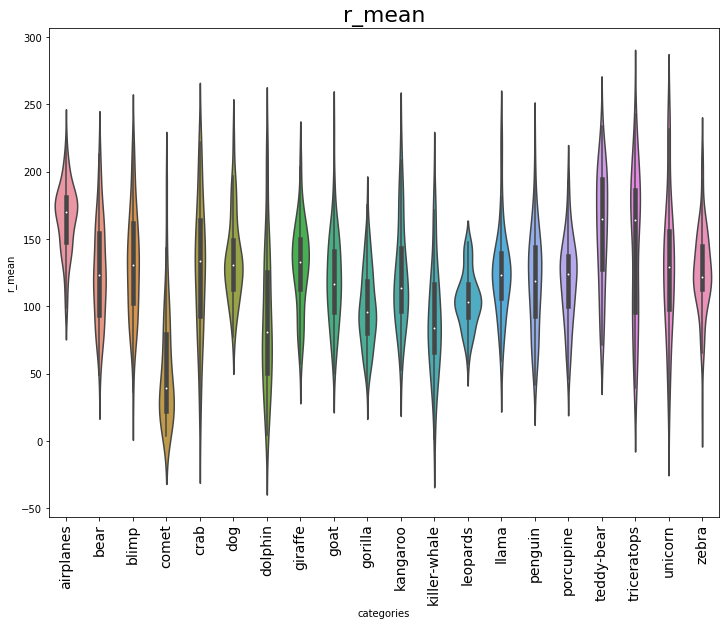

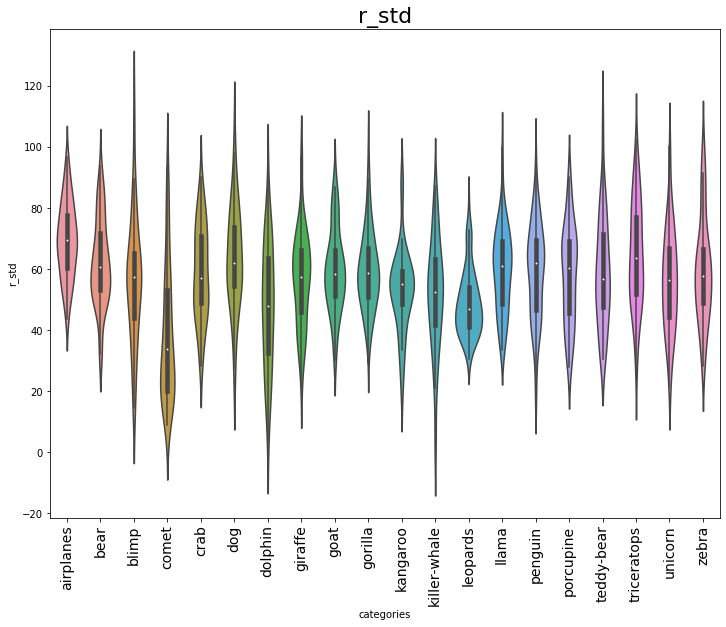

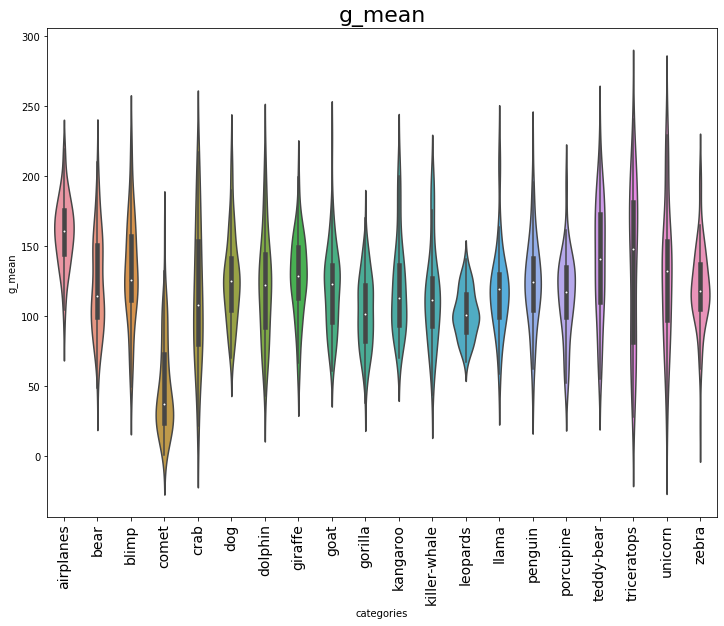

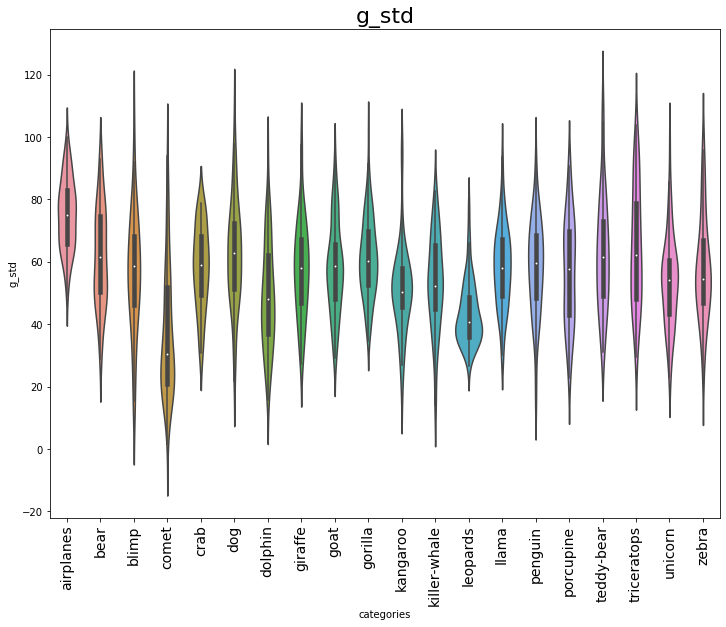

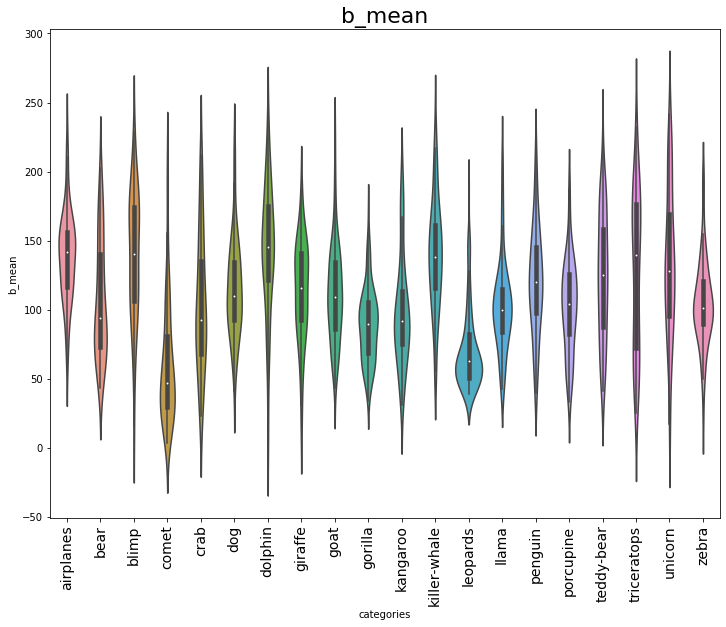

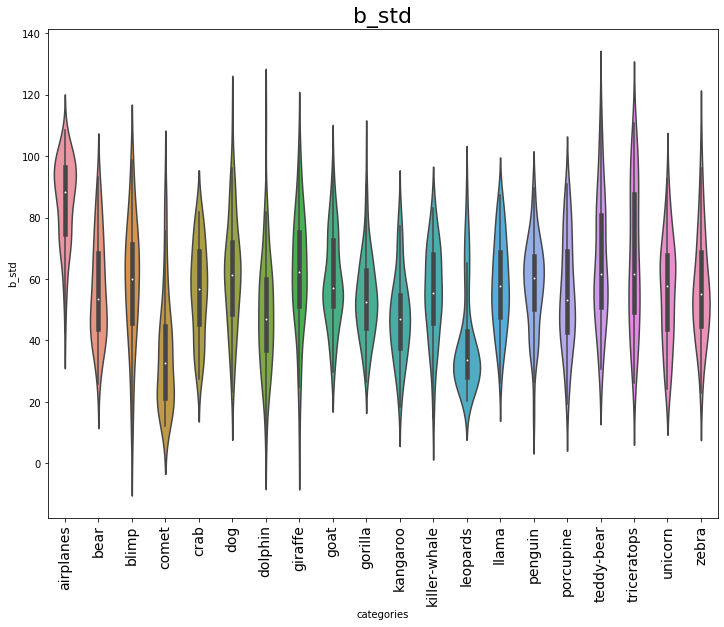

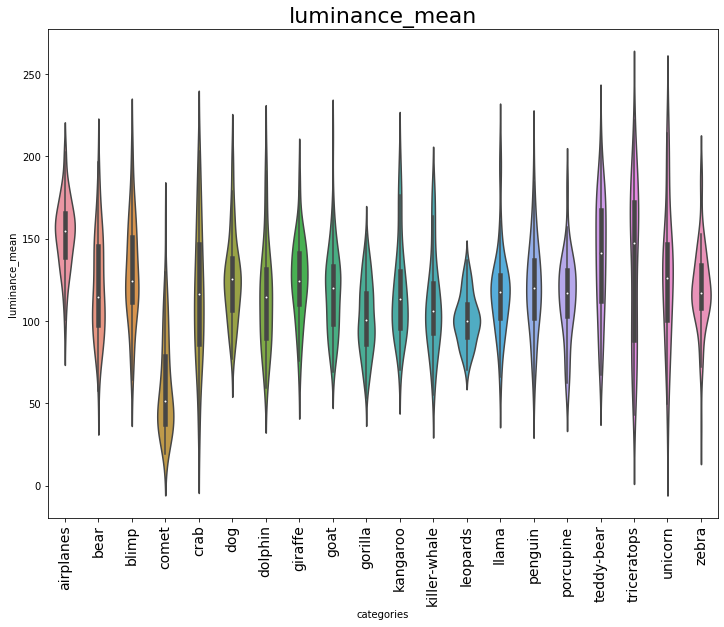

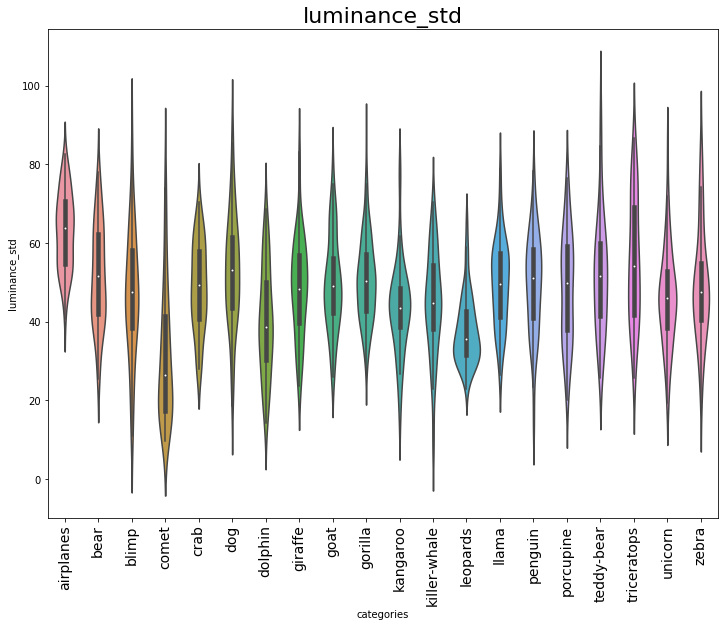

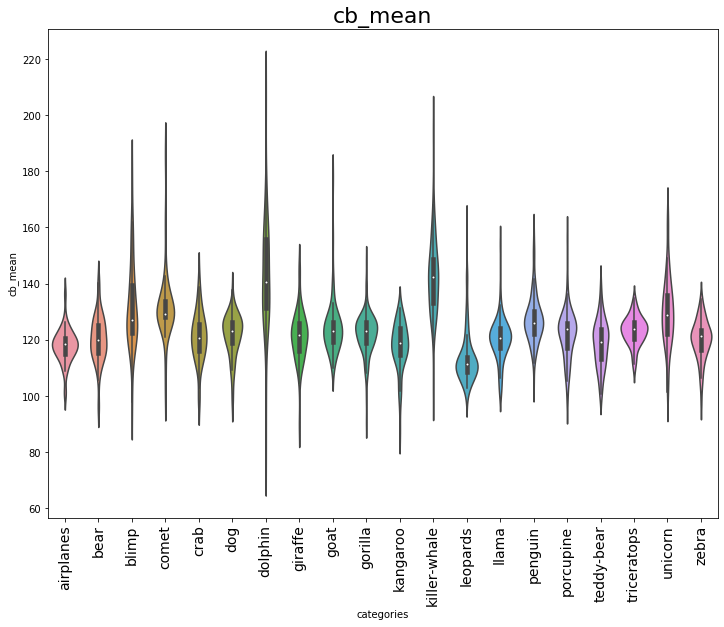

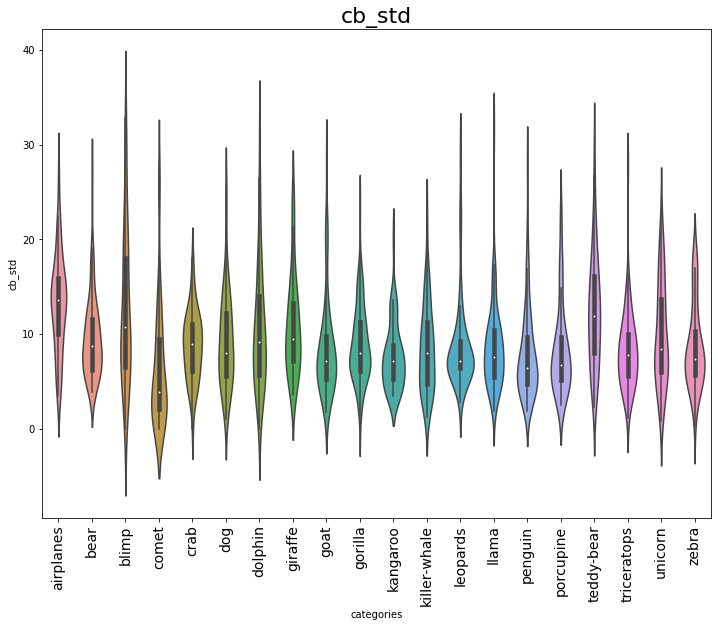

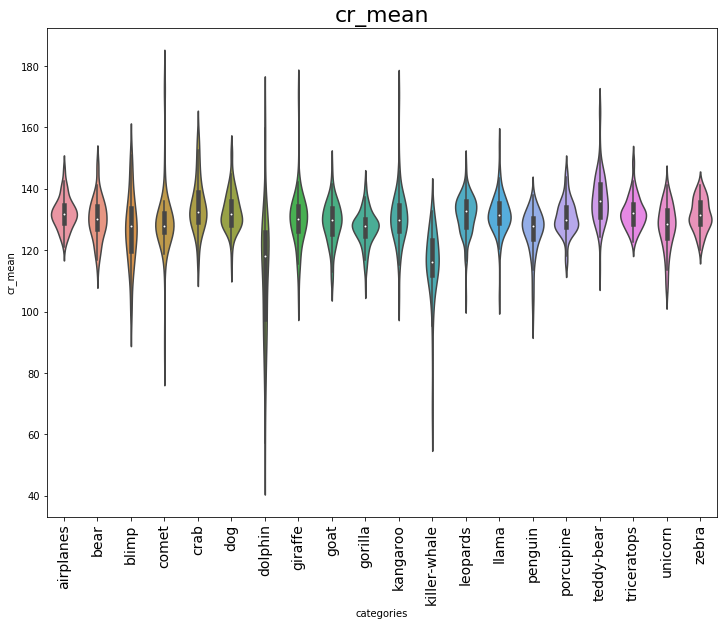

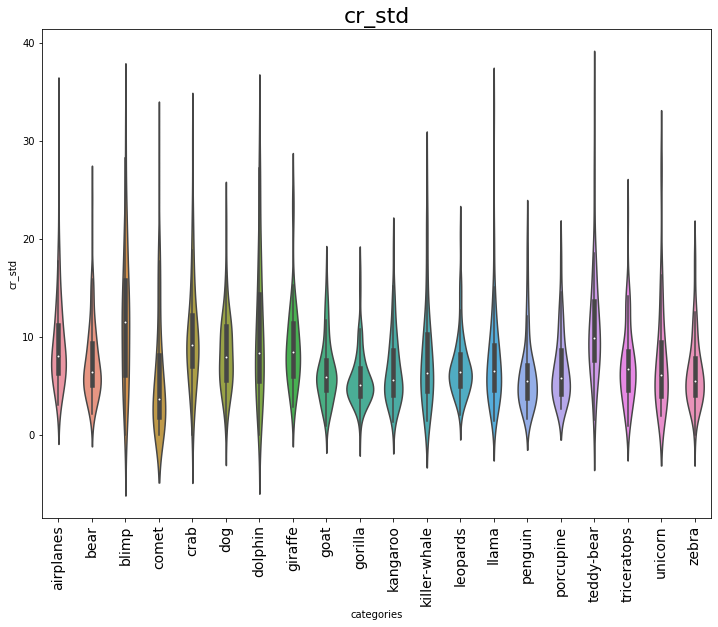

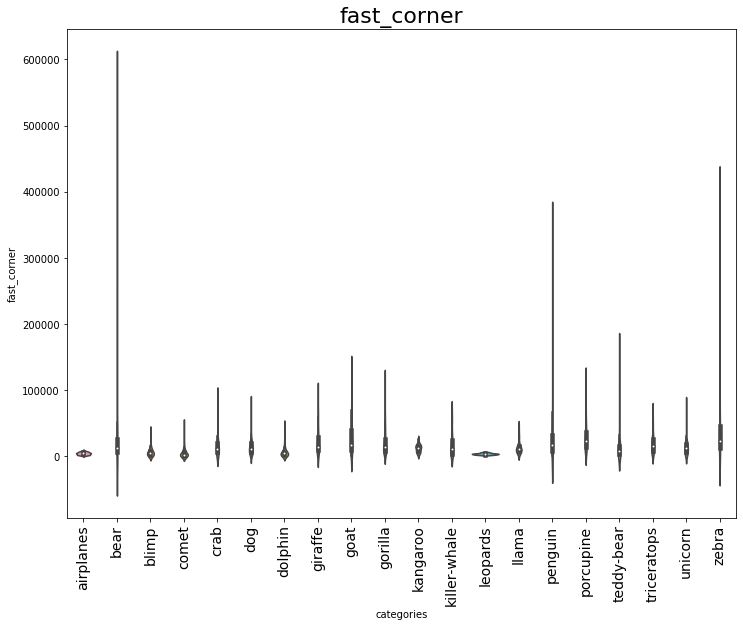

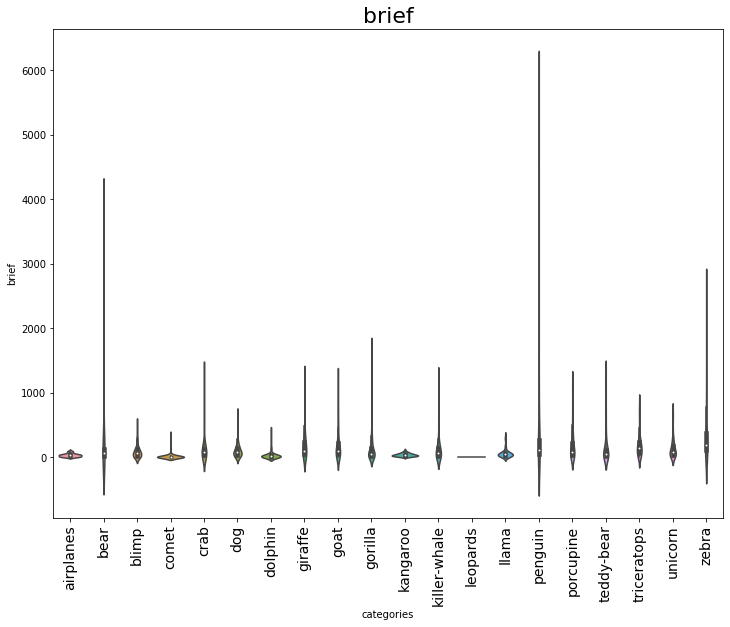

In [46]:
for column in features.columns[:16]:
#     if column != "categories":
    plt.figure(figsize=(12, 9))
    sns.violinplot(x=features['categories'], y=column, data=features)
    plt.title(column, fontsize=22)
    plt.xticks(range(len(categories)),categories, rotation='vertical',fontsize=14)
    plt.show()

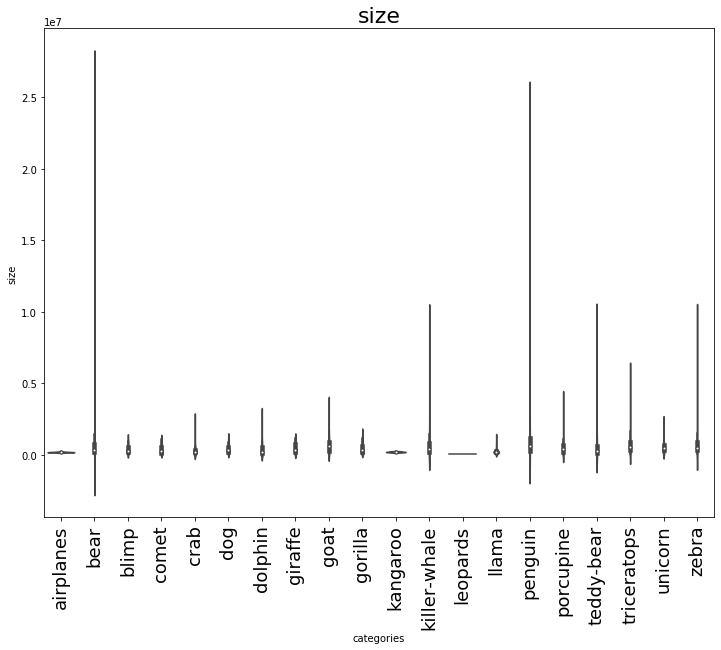

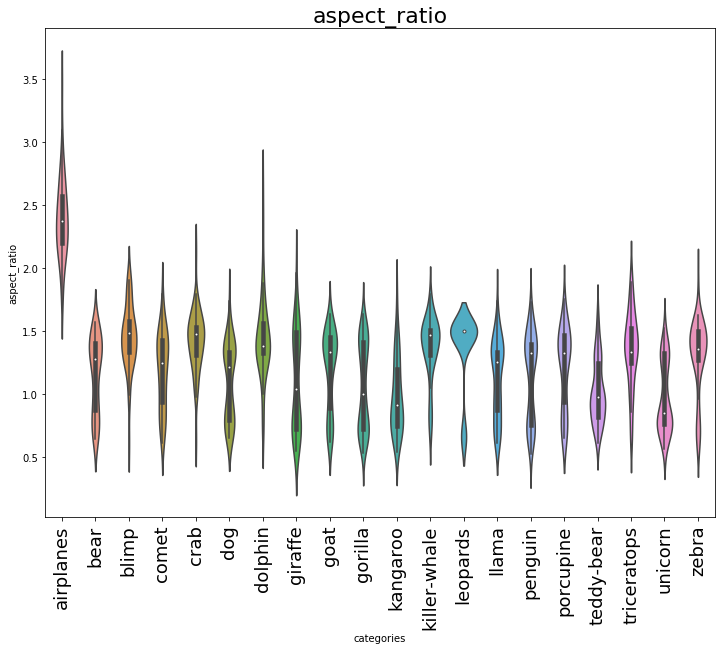

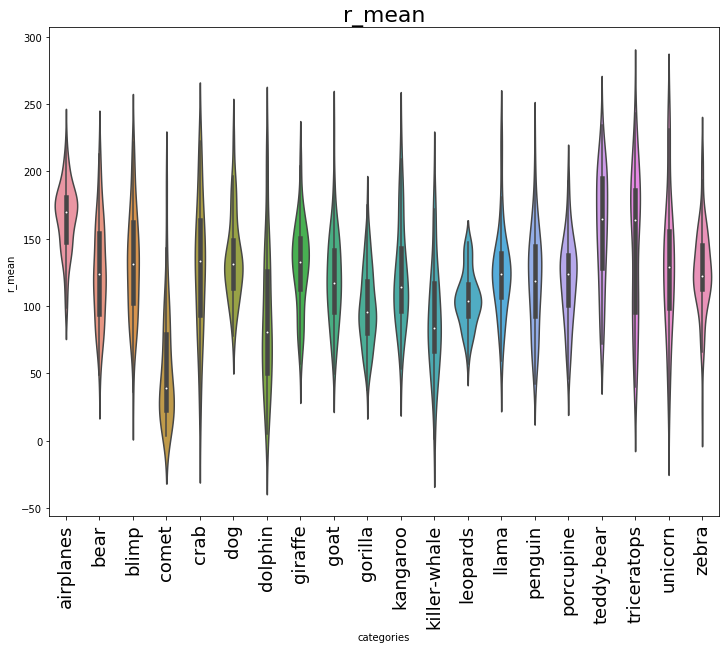

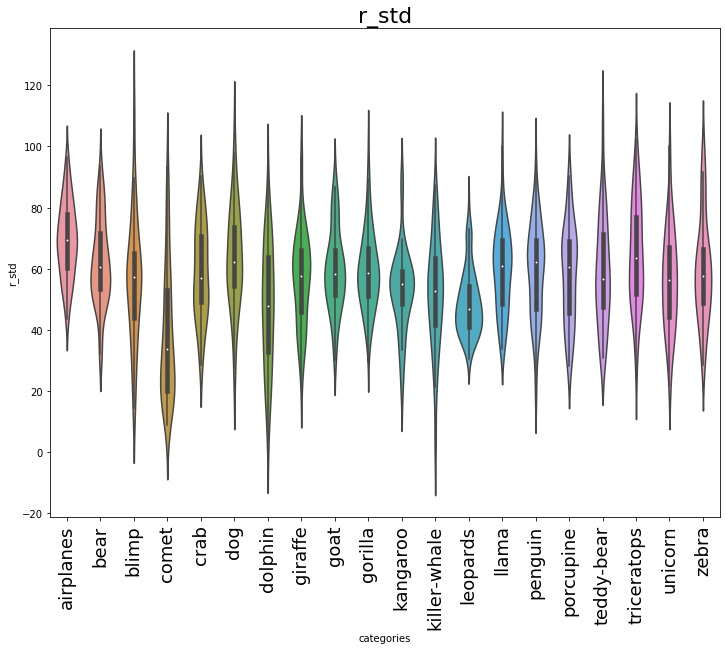

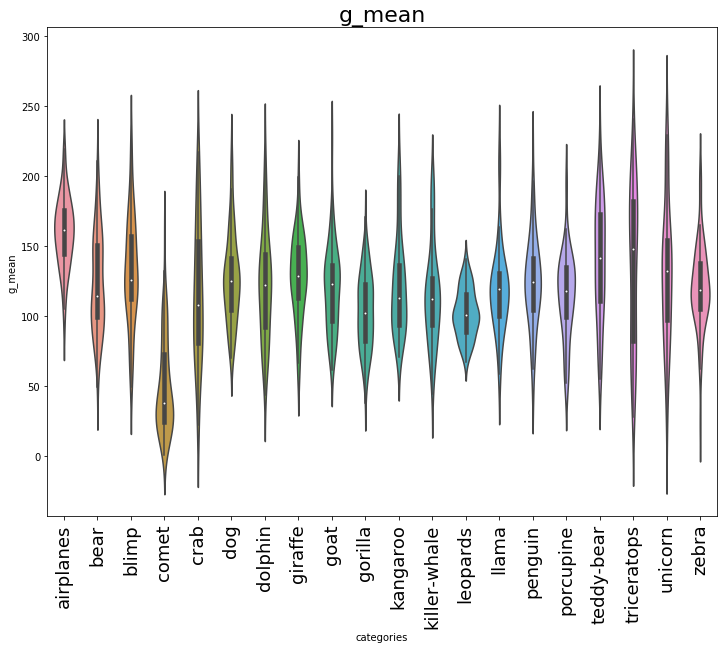

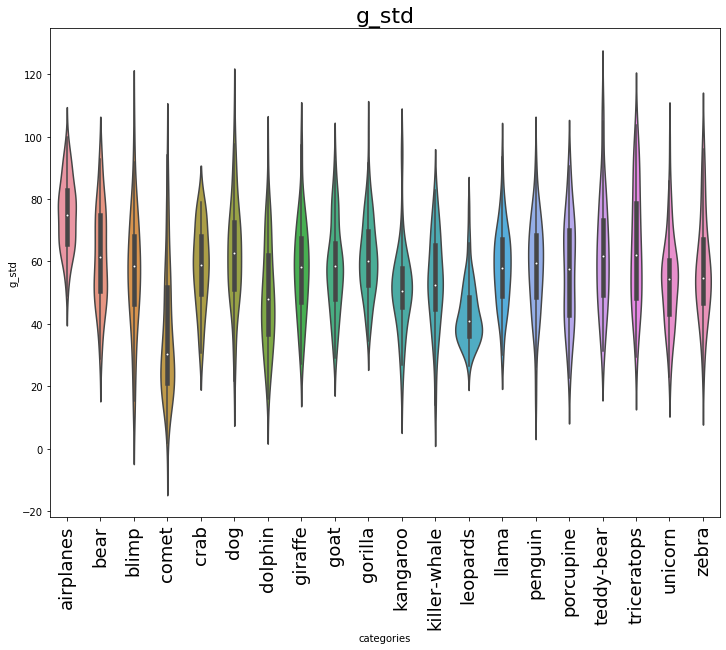

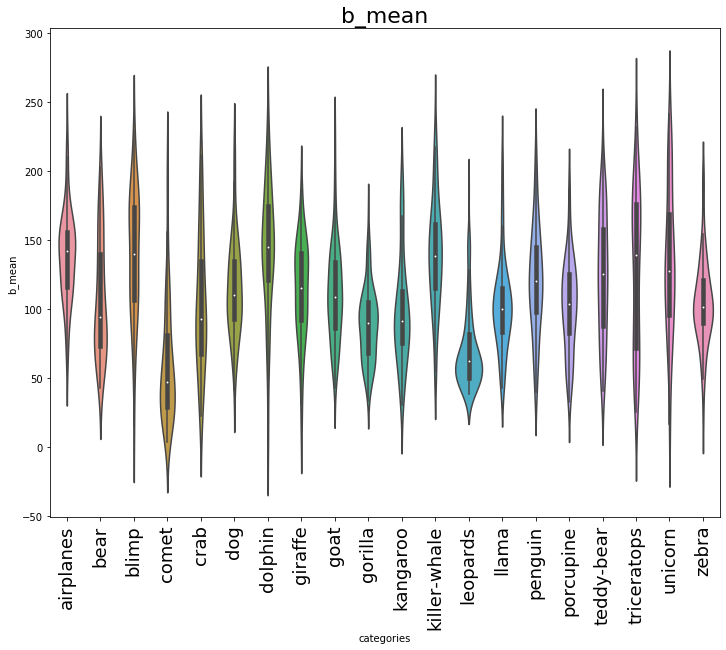

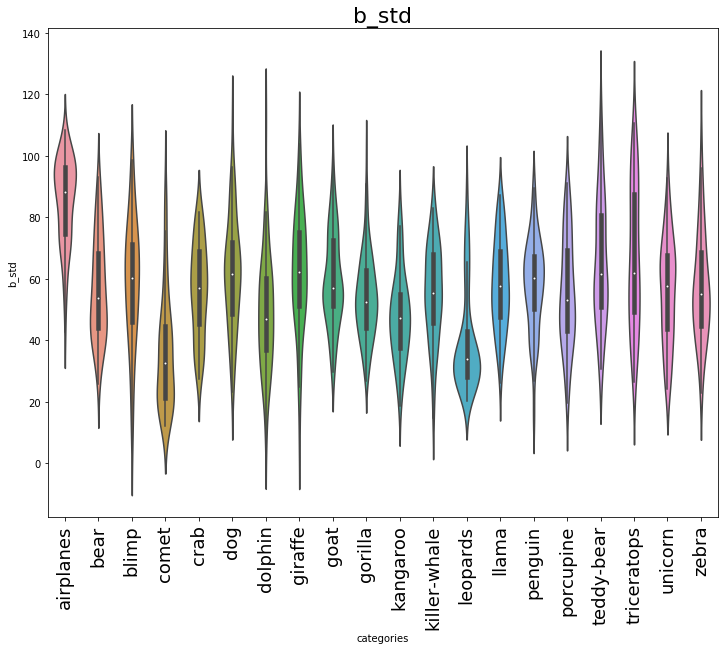

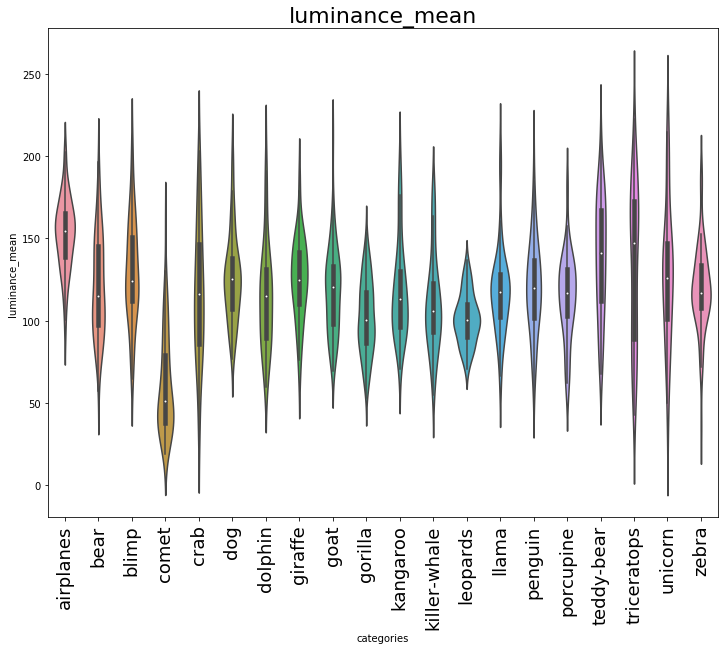

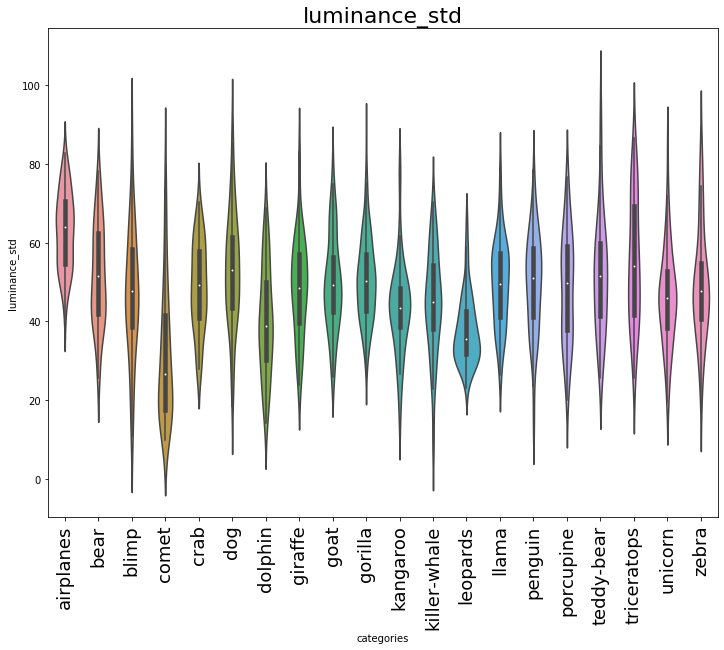

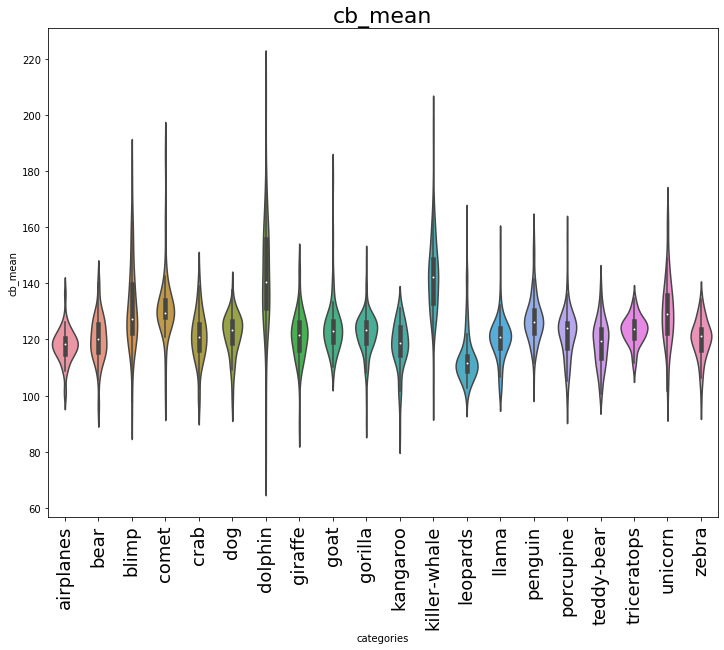

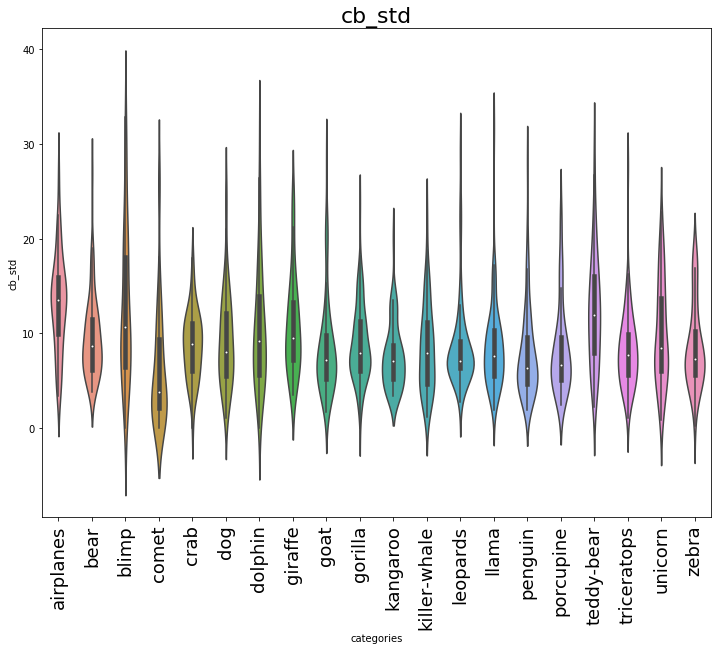

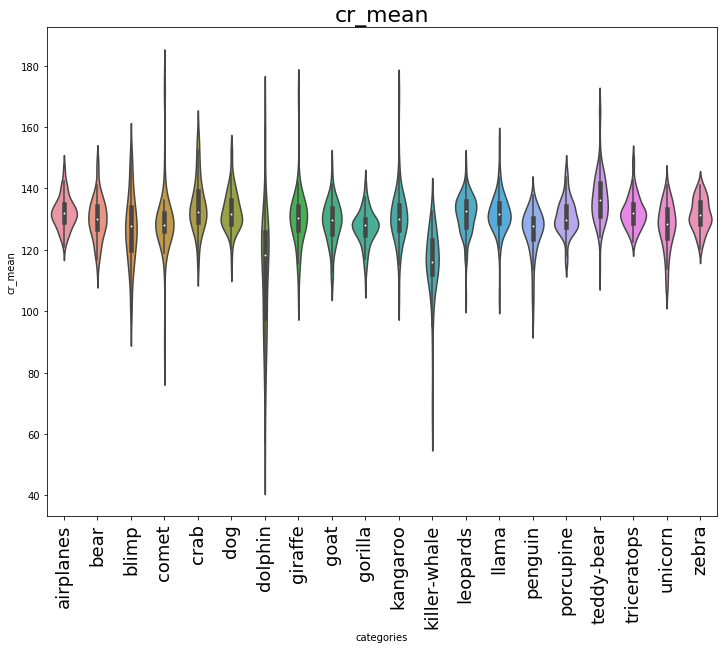

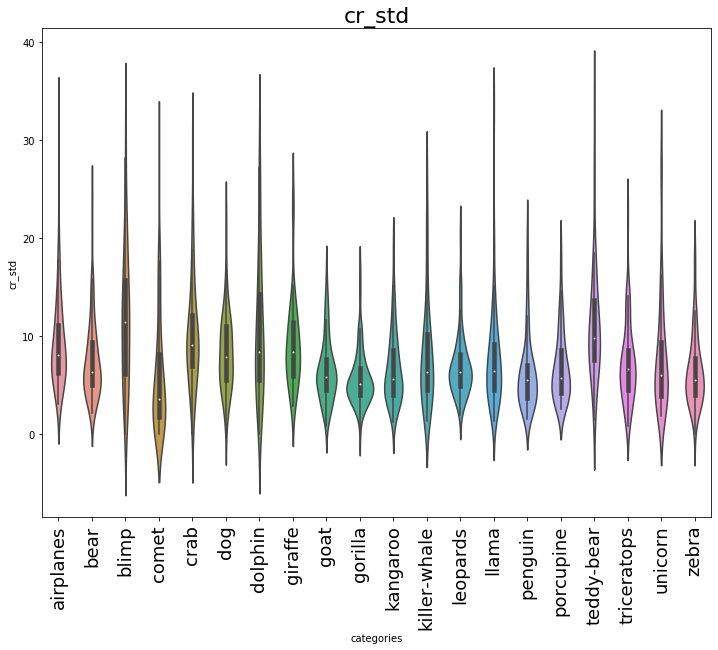

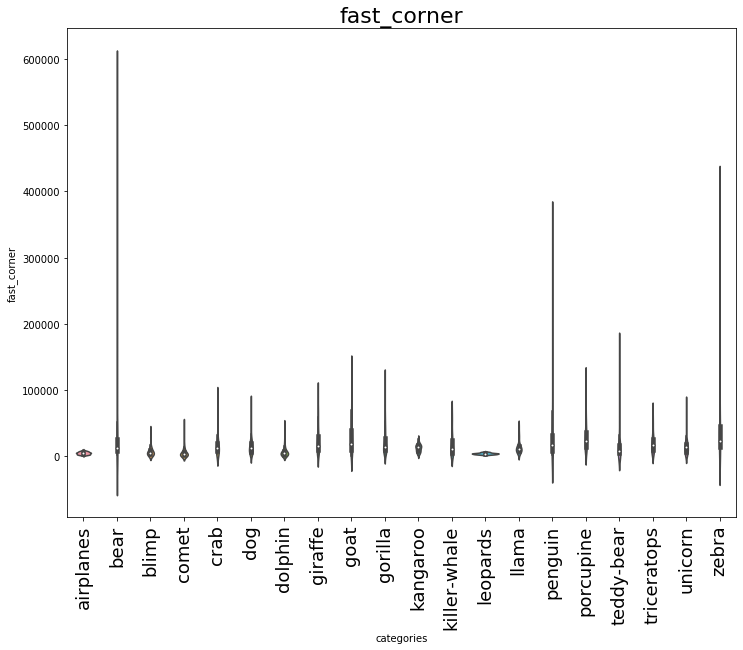

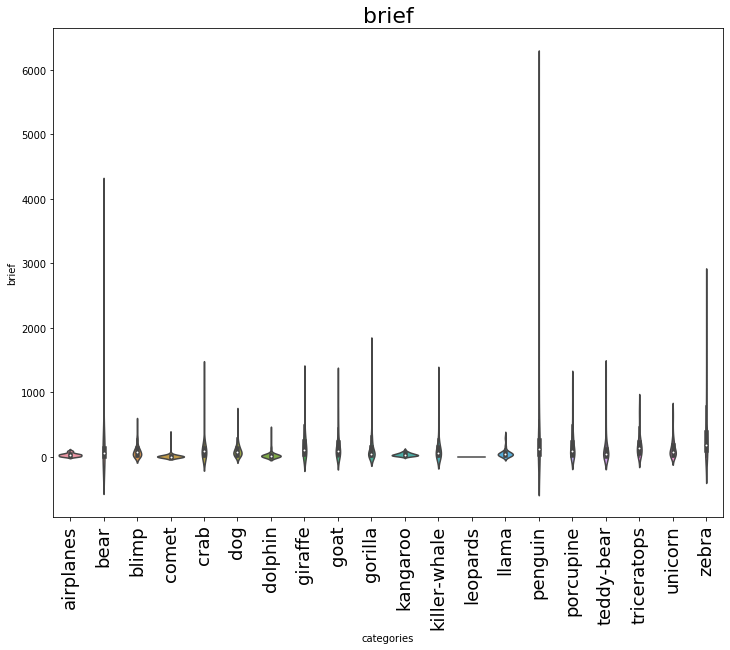

In [48]:
for column in features.columns[:16]:
#     if column != "categories":
    plt.figure(figsize=(12, 9))
    sns.violinplot(x="categories", y=column, data=features)
    plt.title(column, fontsize=22)
    plt.xticks(range(len(categories)), categories, rotation='vertical', fontsize=18)
    plt.show()